# Frame the Problem and Look at the Big Picture

## Define the objective in business terms.

## How will your solution be used?

## What are the current solutions/workarounds (if any)?

## How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

## How should performance be measured?

## Is the performance measure aligned with the business objective?

## What would be the minimum performance needed to reach the business objective?

## What are comparable problems? Can you reuse experience or tools?

## Is human expertise available?

## How would you solve the problem manually?

## List the assumptions you (or others) have made so far.

## Very assumptions if possible.

# Get the Data

## List the data you need and how much you need.

## Find and document where you can get that data.

## Check how much space it will take.

## Check legal obligations, and get authorization if necessary.

## Get access authorizations.

## Create a workspace (with enough storage space).

## Get the data

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
print(mnist.keys())
print(mnist)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.

## Convert the data to a format you can easily manipulate (without changing the data itself).

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.head())
print(y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [3]:
import numpy as np
from sklearn import preprocessing

y = y.astype(np.uint8)
classes = y.drop_duplicates().sort_values().tolist()

## Ensure sensitive information is deleted or protected (eg. anonymized).

## Check the size and type of data (time series, sample, geographical, etc.).

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
None


In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


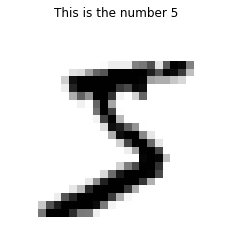

In [6]:
import matplotlib as mlp
import matplotlib.pyplot as plt

i = 0
some_digit = X.iloc[i]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.title(f"This is the number {y[i]}")
plt.axis("off")
plt.show()

## Sample a test set, put it aside, and never look at it (no data snooping!).

### Stratified sampling

In [7]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

shuffle_index = np.random.permutation(y_train.shape[0])
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

shuffle_index = np.random.permutation(y_test.shape[0])
X_test, y_test = X_test.iloc[shuffle_index], y_test.iloc[shuffle_index]

# Explore the Data

## Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

## Study each attribute and its characteristics.
- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
- Usefulness for the task
- Type of distribution (Gaussian, uniform, logarithmic, etc.)

## For supervised learning tasks, identify the target attribute(s).

## Visualize the data

## Study the correlations between attributes.

## Study how you would solve the problem manually.

## Identify the promising transformations you may want to apply.

## Identify extra data that would be useful.

## Document what you have learned.

# Prepare the Data
- Work on copies of the data (keep the original dataset intact).
- Write functions for all data transformations you apply.
    - So you can easily prepare the data the next time you get a fresh dataset
    - So you can apply these transformations in future projects
    - To clean and prepare the test set
    - To clean and prepare new data instances once your solution is live
    - To make it easy to treat your preparation choices as hyperparameters

## Data cleaning.
- Fix or remove outliers (optional)
- Fill in missing values (e.g., with zeros, mean, median...) or drop their rows (or columns) 

## Feature selection (optional).
- Drop the attributes that provide no useful information for the task
- Use some dimensionality reduction technique if necessary (PCA, KernelPCA, LLE...)

## Feature engineering, where appropriate.
- Discretize continuous features
- Decompose features (e.g., categorical, date/time, etc.)
- Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.)
- Aggregate features into promising new features

## Feauture scaling
- Standardize or normalize features

In [8]:
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Reconstruct data
- Use pipelines to automate all steps if possible.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train_prepared = num_pipeline.fit_transform(X_train)

# Shortlisting Promising Models
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).
- Once again, try to automate these steps as much as possible.

## Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.

In [16]:
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import pandas as pd

def plot_normalized_confusion_matrix(confusion_matrix):
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()
    
def accuracy_scores(confusion_matrix):
    msg = "accuracy\n\n"
    accuracies = []
    for i in range(confusion_matrix.shape[0]):
        tp = confusion_matrix[i][i]
        fn = sum(np.delete(confusion_matrix[i], i))
        fp = sum(np.delete(confusion_matrix[:, i], i))
        tn = sum(sum(np.delete(np.delete(confusion_matrix, i, 0), i, 1)))
        accuracy = (tp+tn)/(tp+  fn+  fp+  tn)
        accuracies.append(accuracy)
        msg += str(round(accuracy,2))+"\n"
    msg += f"accuracy avg: {round(np.mean(accuracies),2)}\n\n"
    return msg
    
class analyze_classifier():
    def __init__(self, classifier, X, y, y_score=np.array([])):
        
        if len(y_score)==0:
            try:
                self.y_score = classifier.decision_function(X)
            except:
                self.y_score = classifier.predict_proba(X)
        else:
            self.y_score = y_score
        self.classifier = classifier
        self.X = X
        self.y = y
        self.y_binarized = label_binarize(y, classes=classifier.classes_)
        self.precision, self.recall, self.threshold, self.average_precision = self.get_precision_recall_classes()
        self.fpr, self.tpr, self.roc_auc = self.get_roc_auc_classes()
        self.colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "red", "green", "black", "blue", "pink"])

        
    def get_precision_recall_classes(self):
        
        # For each class
        precision = dict()
        recall = dict()
        average_precision = dict()
        threshold = dict()
        for i in range(self.classifier.n_classes_):
            precision[i], recall[i], threshold[i] = precision_recall_curve(self.y_binarized[:, i], self.y_score[:, i])
            average_precision[i] = average_precision_score(self.y_binarized[:, i], self.y_score[:, i])
            
        # A "micro-average": quantifying score on all classes jointly       
        precision["micro"], recall["micro"], threshold["micro"] = precision_recall_curve(
            self.y_binarized.ravel(), 
            self.y_score.ravel()
        )
        average_precision["micro"] = average_precision_score(self.y_binarized, self.y_score, average="micro")
        
        return precision, recall, threshold, average_precision
        
    def get_roc_auc_classes(self):
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(self.classifier.n_classes_):
            fpr[i], tpr[i], _ = roc_curve(self.y_binarized[:, i], self.y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(self.y_binarized.ravel(), self.y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(self.classifier.n_classes_)])) # First aggregate all false positive rates
        mean_tpr = np.zeros_like(all_fpr) # Then interpolate all ROC curves at this points
        for i in range(self.classifier.n_classes_):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= self.classifier.n_classes_ # Finally average it and compute AUC

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        
        return fpr, tpr, roc_auc
    
    def plot_precision_recall_micro(self):
        
        _, ax = plt.subplots(figsize=(16, 9))
        display = PrecisionRecallDisplay(
            recall=self.recall["micro"],
            precision=self.precision["micro"],
            average_precision=self.average_precision["micro"],

        )
        display.plot(ax=ax)
        _ = display.ax_.set_title("Micro-averaged over all classes")
        
    def plot_precision_recall_classes(self):
        
        # setup plot details
        _, ax = plt.subplots(figsize=(16, 9))

        f_scores = np.linspace(0.2, 0.8, num=4)
        lines, labels = [], []
        for f_score in f_scores:
            x = np.linspace(0.01, 1)
            y = f_score * x / (2 * x - f_score)
            (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
            plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

        display = PrecisionRecallDisplay(
            recall=self.recall["micro"],
            precision=self.precision["micro"],
            average_precision=self.average_precision["micro"],
        )
        display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

        for i, color in zip(range(self.classifier.n_classes_), self.colors):
            display = PrecisionRecallDisplay(
                recall=self.recall[i],
                precision=self.precision[i],
                average_precision=self.average_precision[i],
            )
            display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

        # add the legend for the iso-f1 curves
        handles, labels = display.ax_.get_legend_handles_labels()
        handles.extend([l])
        labels.extend(["iso-f1 curves"])
        # set the legend and the axes
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.legend(handles=handles, labels=labels, loc="best")
        ax.set_title("Extension of Precision-Recall curve to multi-class")

        plt.show()
        
    def plot_precision_recall_vs_threshold(self, classes_indexes=True):
        
        if classes_indexes==True:
            classes_indexes = list(self.classifier.classes_)
        
        plt.figure(figsize=(16,9))
        for c, color in zip(classes_indexes, self.colors):
            plt.plot(self.threshold[c], self.precision[c][:-1], "--", color=color)
            plt.plot(self.threshold[c], self.recall[c][:-1], "-", label='class {}'.format(c), color=color)
        plt.xlabel("Threshold")
        plt.legend(loc="best")
        plt.title("Precision (--) and Recall (-) vs. Threshold Curve")
        plt.grid(visible=True)
        plt.show()
        
    def plot_roc_micro_macro(self):
        # micro and macro ROC curve
        _, ax = plt.subplots(figsize=(16, 9))
        lw = 2
        ax.plot(
            self.fpr['micro'],
            self.tpr['micro'],
            lw=lw,
            label=("ROC curve micro (area = %0.2f)" % self.roc_auc['micro']),
        )
        ax.plot(
            self.fpr['macro'],
            self.tpr['macro'],
            lw=lw,
            label=("ROC curve macro (area = %0.2f)" % self.roc_auc['macro']),
        )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic for %s" % self.classifier.get_params()['estimator__steps'][0][-1])
        plt.legend(loc="lower right")
        plt.show()
        
    def plot_roc_classes(self):
        _, ax = plt.subplots(figsize=(16, 9))
        lw = 2
        for c, color in zip(range(self.classifier.n_classes_), self.colors):
            ax.plot(
                self.fpr[c],
                self.tpr[c],
                color=color,
                lw=lw,
                label=("ROC curve for class %d (area = %0.2f)" % (c, self.roc_auc[c])),
            )
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic for each class")
        plt.legend(loc="lower right")
        plt.show()

### Stochastic Gradient Descent

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier#, OneVsOneClassifier
from sklearn.pipeline import make_pipeline

sgd_classifier = OneVsRestClassifier(
    make_pipeline(SGDClassifier(random_state=42))
)
sgd_classifier.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('sgdclassifier',
                                               SGDClassifier(random_state=42))]))

[[5585    0   11    6    6   23   29    3  260    0]
 [   0 6427   38   15    3   39    5    5  206    4]
 [  18   21 5273   70   60   19   48   34  411    4]
 [  21   13   90 5248    0  151   24   35  496   53]
 [   9   12   28    8 5231    6   28   13  394  113]
 [  21   16   19  128   44 4462   71   11  597   52]
 [  25   15   33    2   29   71 5581    7  155    0]
 [  17    9   42   12   36   12    4 5730  243  160]
 [  11   54   31   85    1  101   26    6 5503   33]
 [  19   18   24   52  103   22    1  144  506 5060]]


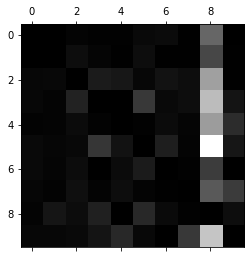

In [13]:
from sklearn.metrics import confusion_matrix
y_train_pred =  sgd_classifier.predict(X_train_prepared)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [14]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5923
           1       0.98      0.95      0.96      6742
           2       0.94      0.89      0.91      5958
           3       0.93      0.86      0.89      6131
           4       0.95      0.90      0.92      5842
           5       0.91      0.82      0.86      5421
           6       0.96      0.94      0.95      5918
           7       0.96      0.91      0.94      6265
           8       0.63      0.94      0.75      5851
           9       0.92      0.85      0.89      5949

    accuracy                           0.90     60000
   macro avg       0.92      0.90      0.90     60000
weighted avg       0.92      0.90      0.91     60000



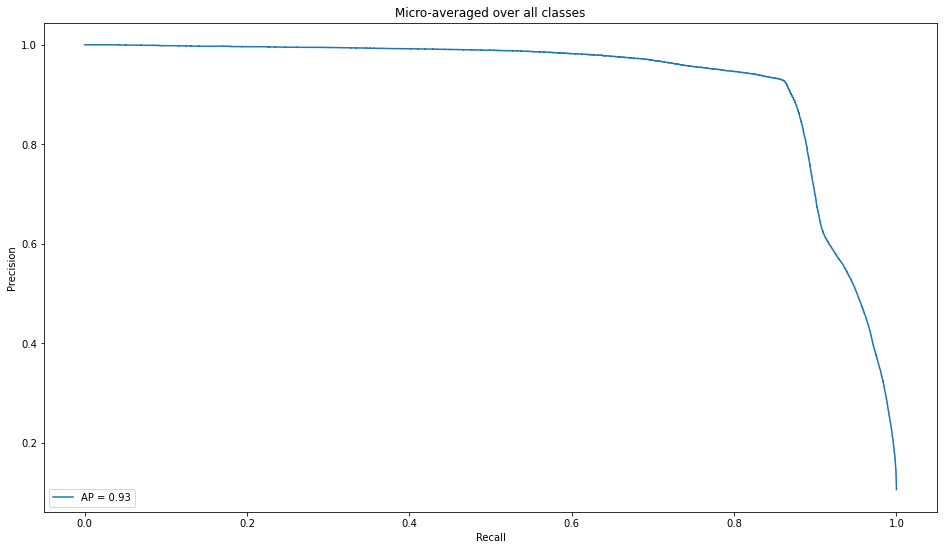

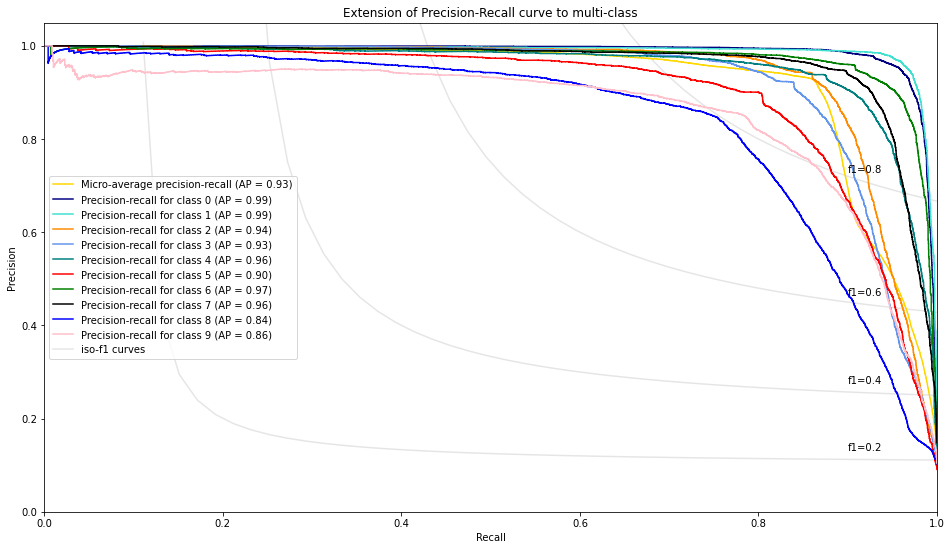

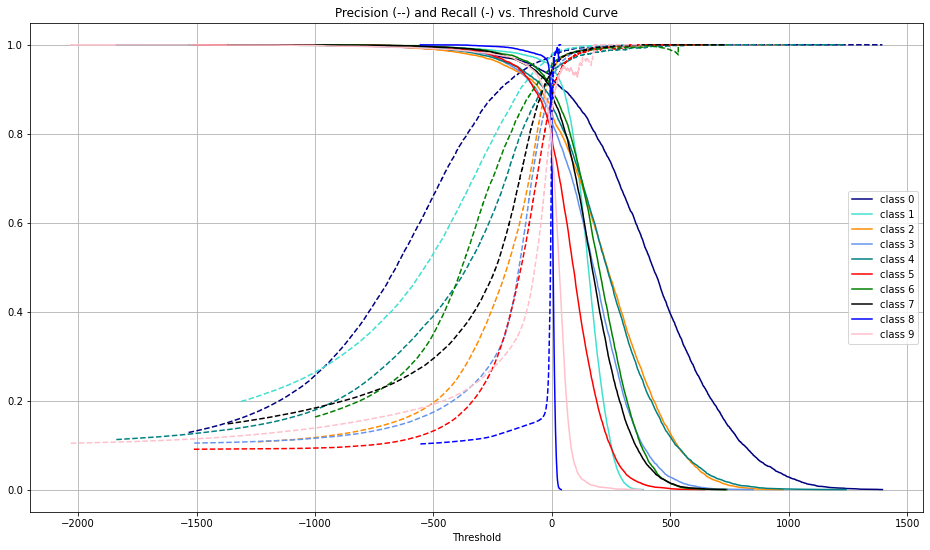

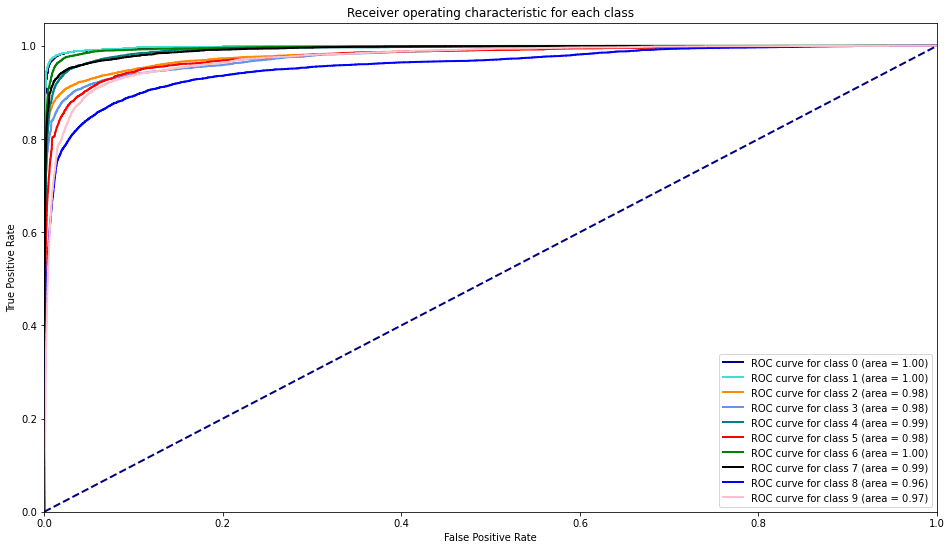

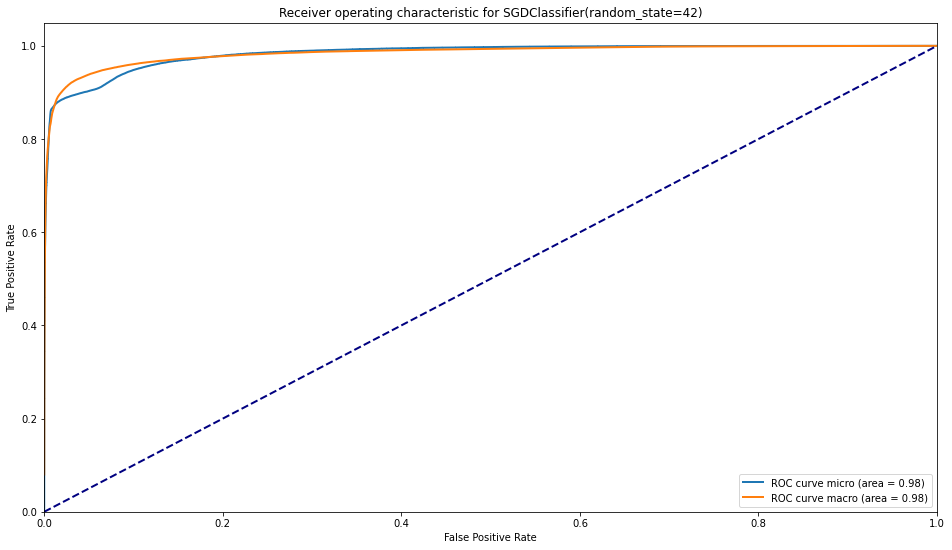

In [17]:
sgd = analyze_classifier(sgd_classifier, X_train_prepared, y_train)
sgd.plot_precision_recall_micro()
sgd.plot_precision_recall_classes()
sgd.plot_precision_recall_vs_threshold()
sgd.plot_roc_classes()
sgd.plot_roc_micro_macro()

###  Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = OneVsRestClassifier(
    make_pipeline(RandomForestClassifier(random_state=42))
)
rf_classifier.fit(X_train_prepared, y_train)

OneVsRestClassifier(estimator=Pipeline(steps=[('randomforestclassifier',
                                               RandomForestClassifier(random_state=42))]))

[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


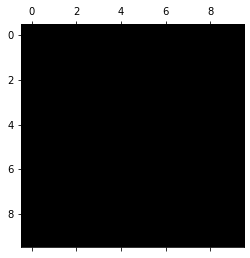

In [19]:
y_train_pred =  rf_classifier.predict(X_train_prepared)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [20]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



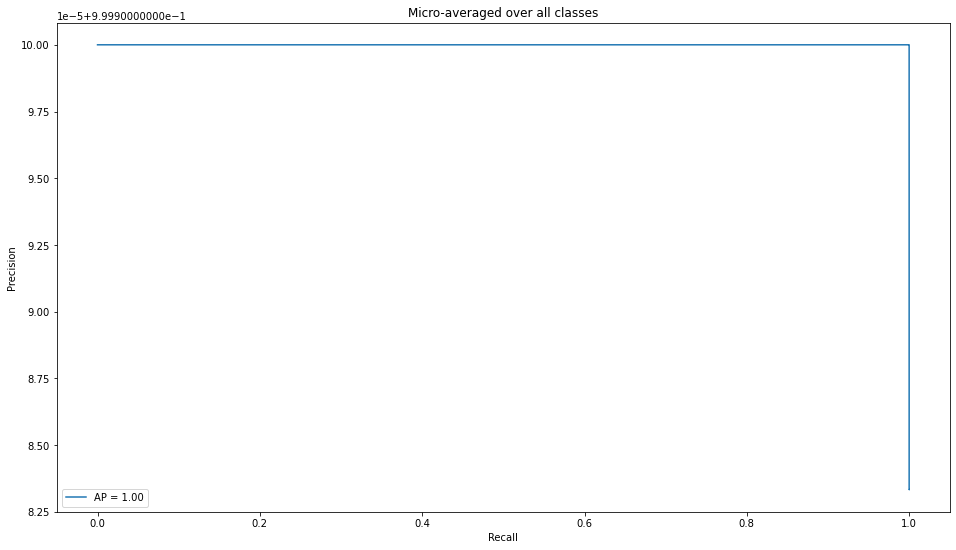

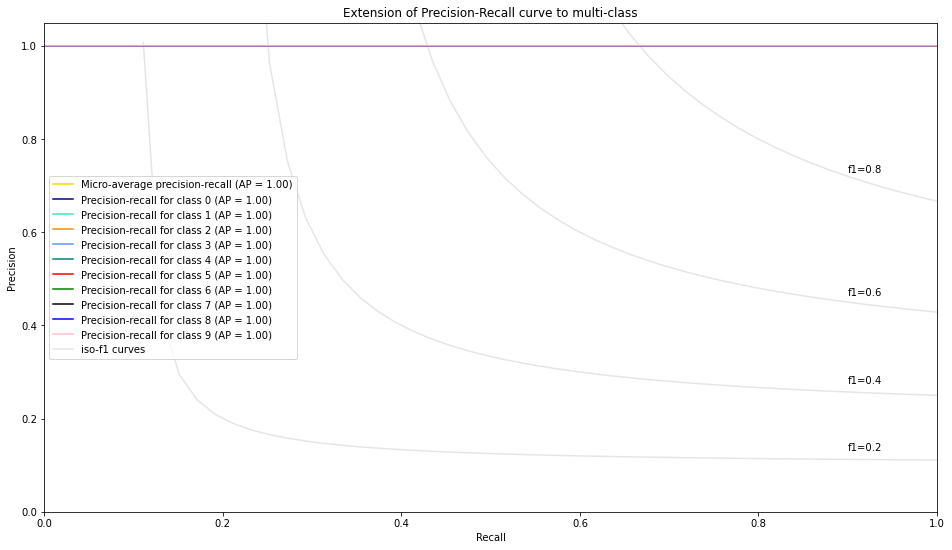

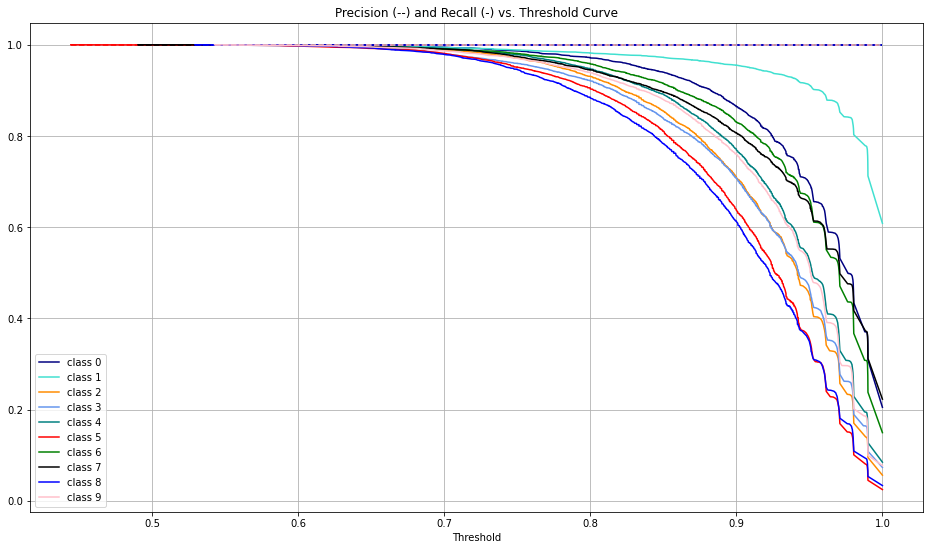

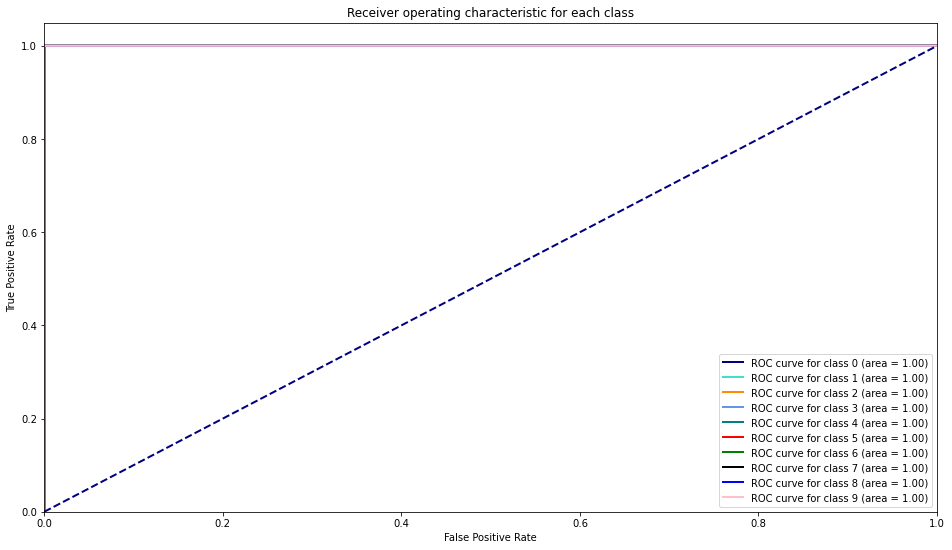

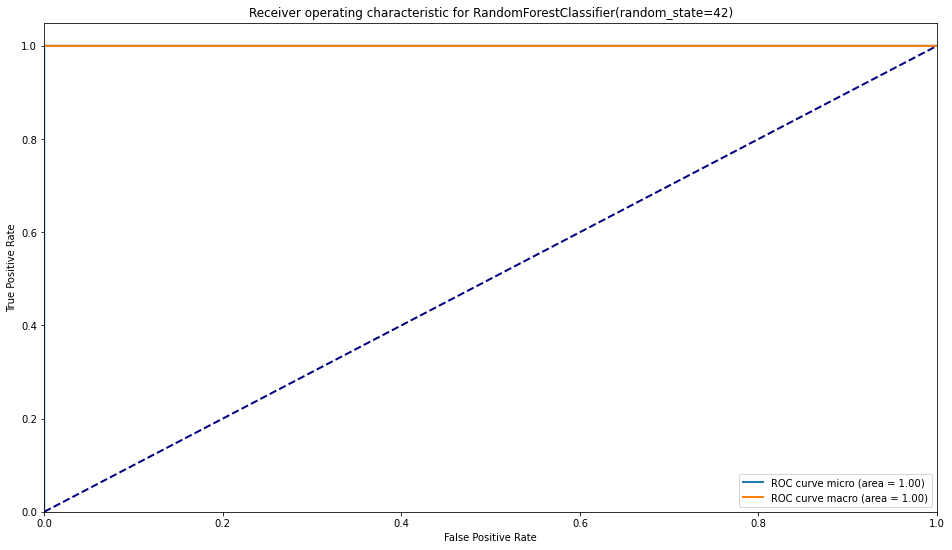

In [21]:
rfc = analyze_classifier(rf_classifier, X_train_prepared, y_train)
rfc.plot_precision_recall_micro()
rfc.plot_precision_recall_classes()
rfc.plot_precision_recall_vs_threshold()
rfc.plot_roc_classes()
rfc.plot_roc_micro_macro()

## Measure and compare their performance.
- For each model, use N-fold cross-validation and compute the mean and standard deviation of the performance measure on the N folds.

### Stochastic Gradient Decent
- [Multilabel PrecisionVsRecall example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

- [Multilabel ROC example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict

sgd_classifier.classes_ = classes
y_train_score = cross_val_predict(sgd_classifier, X_train_prepared, y_train, cv=3, method="decision_function")
y_train_pred = np.argmax(y_train_score, axis=1)

C:\Users\feder\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\feder\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\feder\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[[5600    0   15    5    9   49   39    5  200    1]
 [   1 6423   46   20    4   43    5   10  177   13]
 [  24   27 5282   83   68   24   64   38  339    9]
 [  27   19  119 5232    1  219   25   43  381   65]
 [  10   14   46   11 5237    8   40   14  289  173]
 [  29   20   34  151   47 4533   75   23  446   63]
 [  30   17   45    2   40   86 5554    5  139    0]
 [  17   14   49   18   48   13    4 5721  169  212]
 [  21   62   43   90    2  112   30   12 5435   44]
 [  23   24   26   56  127   37    1  174  314 5167]]


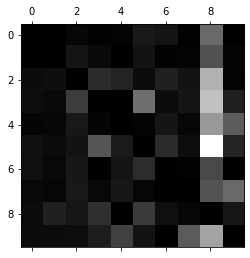

In [23]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5923
           1       0.97      0.95      0.96      6742
           2       0.93      0.89      0.91      5958
           3       0.92      0.85      0.89      6131
           4       0.94      0.90      0.92      5842
           5       0.88      0.84      0.86      5421
           6       0.95      0.94      0.94      5918
           7       0.95      0.91      0.93      6265
           8       0.69      0.93      0.79      5851
           9       0.90      0.87      0.88      5949

    accuracy                           0.90     60000
   macro avg       0.91      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



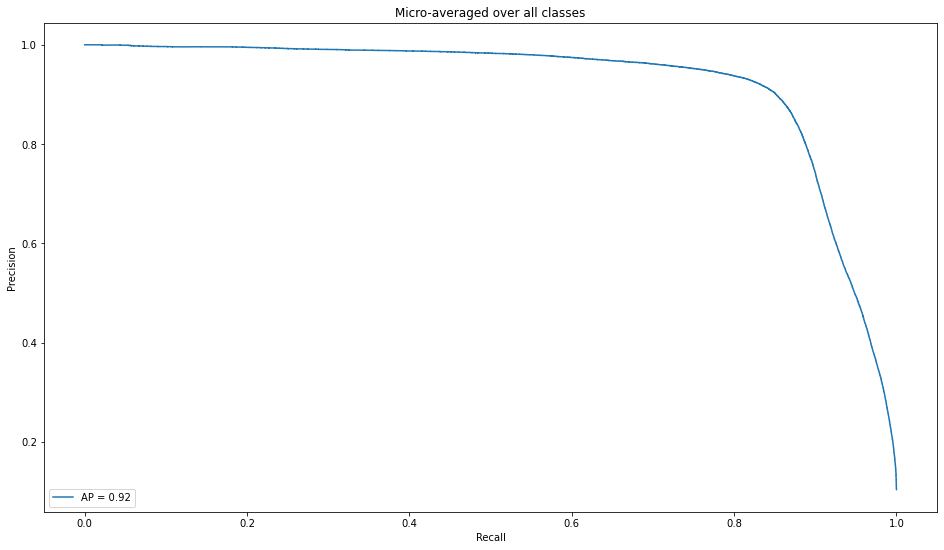

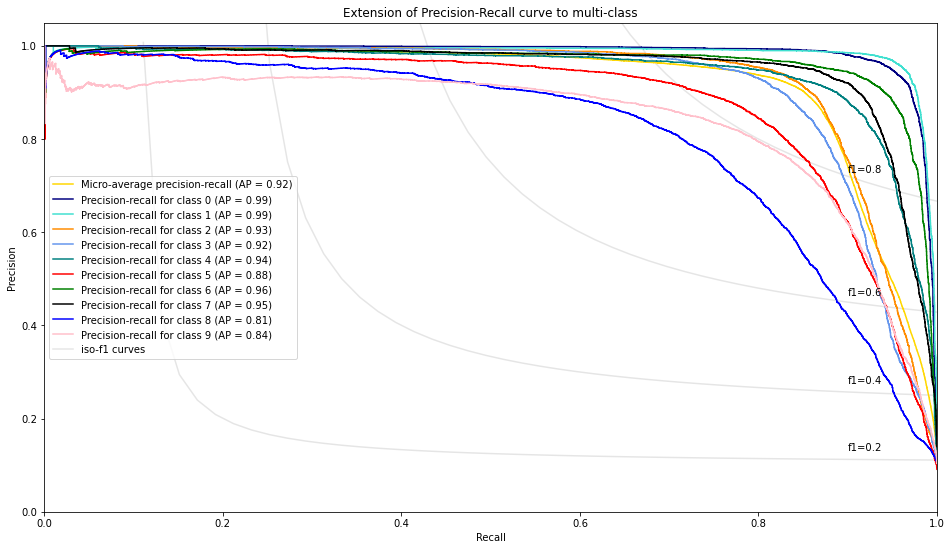

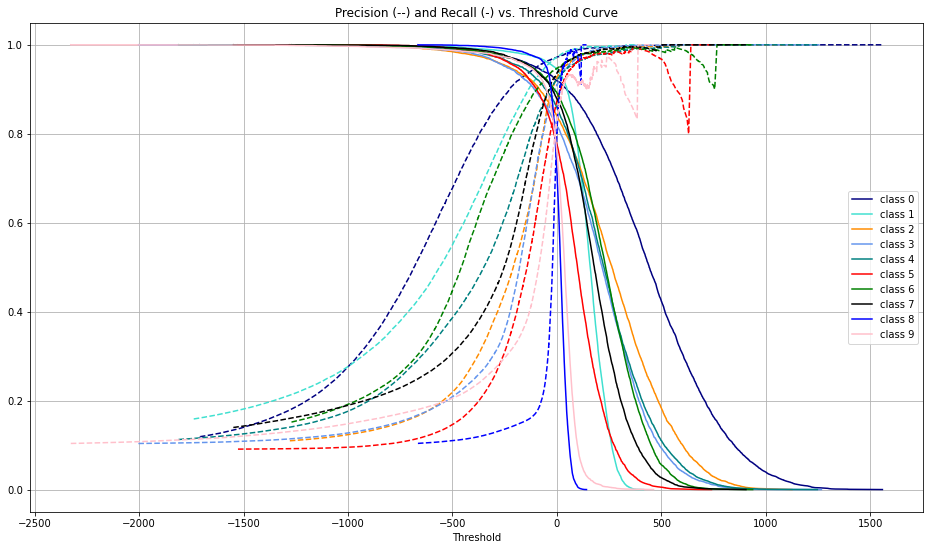

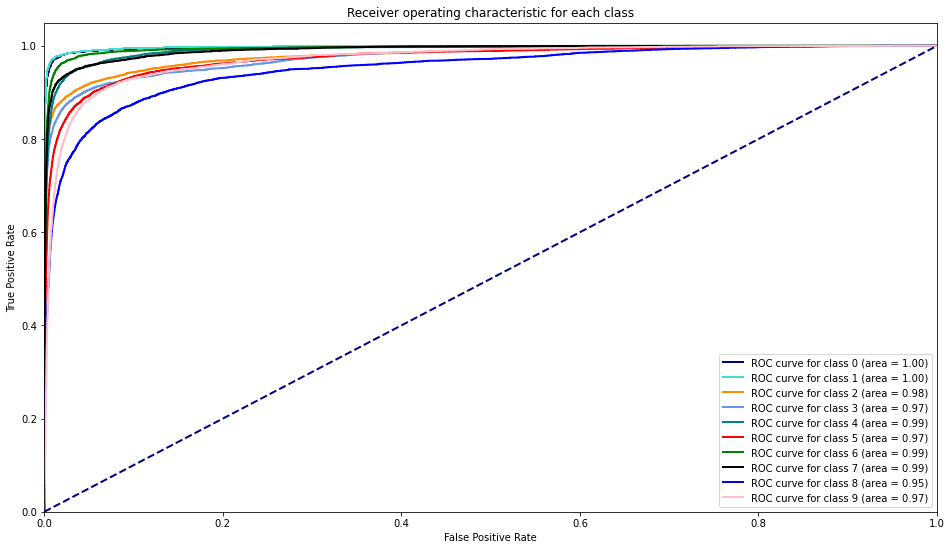

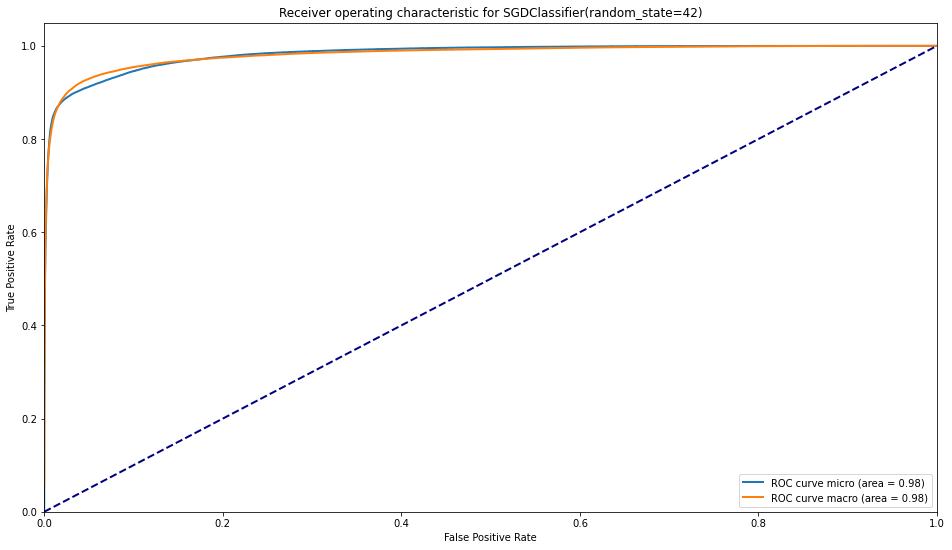

In [25]:
sgd = analyze_classifier(sgd_classifier, X_train_prepared, y_train, y_train_score)
sgd.plot_precision_recall_micro()
sgd.plot_precision_recall_classes()
sgd.plot_precision_recall_vs_threshold()
sgd.plot_roc_classes()
sgd.plot_roc_micro_macro()

### Random Forest

In [26]:
rf_classifier.classes_ = classes
y_train_score = cross_val_predict(rf_classifier, X_train_prepared, y_train, cv=3, method="predict_proba")
y_train_pred = np.argmax(y_train_score, axis=1)

[[5833    1    8    3    5    7   12    2   49    3]
 [   2 6627   50   12   12    1   12   11   11    4]
 [  28   12 5768   30   24    1   10   28   48    9]
 [   7    9   93 5803    3   41   11   52   70   42]
 [   6   11   16    0 5649    0   26   10   16  108]
 [  26    4    9   68   12 5181   63    5   31   22]
 [  21    8    6    0   12   64 5777    0   29    1]
 [  11   24   62    9   27    0    0 6029    9   94]
 [  12   33   45   48   24   41   37   10 5542   59]
 [  21   11   18   73   66   15    2   72   41 5630]]


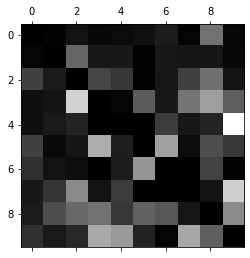

In [27]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plot_normalized_confusion_matrix(conf_mx)

In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5923
           1       0.98      0.98      0.98      6742
           2       0.95      0.97      0.96      5958
           3       0.96      0.95      0.95      6131
           4       0.97      0.97      0.97      5842
           5       0.97      0.96      0.96      5421
           6       0.97      0.98      0.97      5918
           7       0.97      0.96      0.97      6265
           8       0.95      0.95      0.95      5851
           9       0.94      0.95      0.94      5949

    accuracy                           0.96     60000
   macro avg       0.96      0.96      0.96     60000
weighted avg       0.96      0.96      0.96     60000



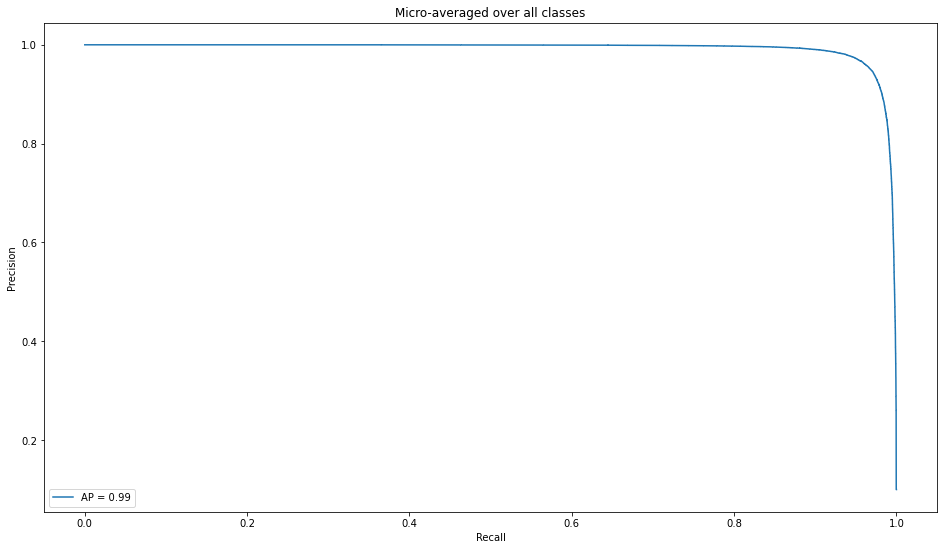

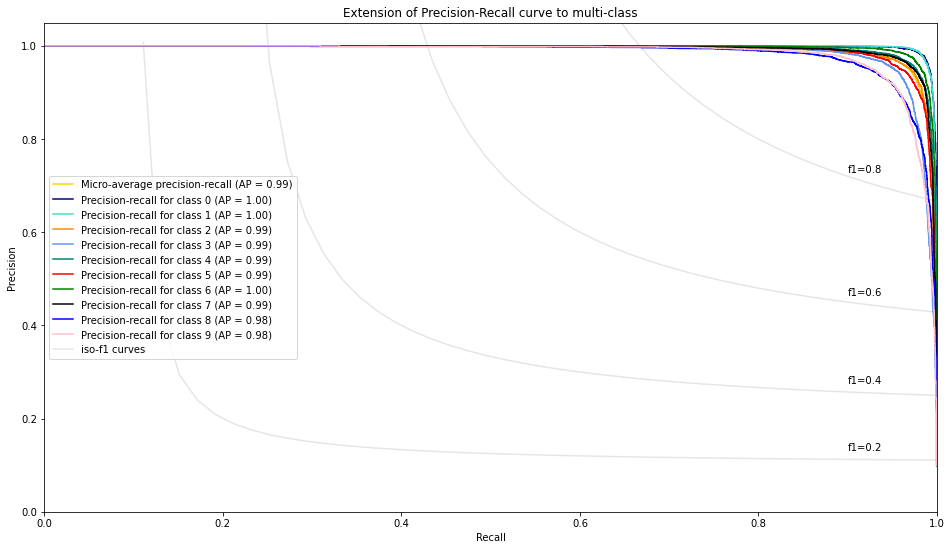

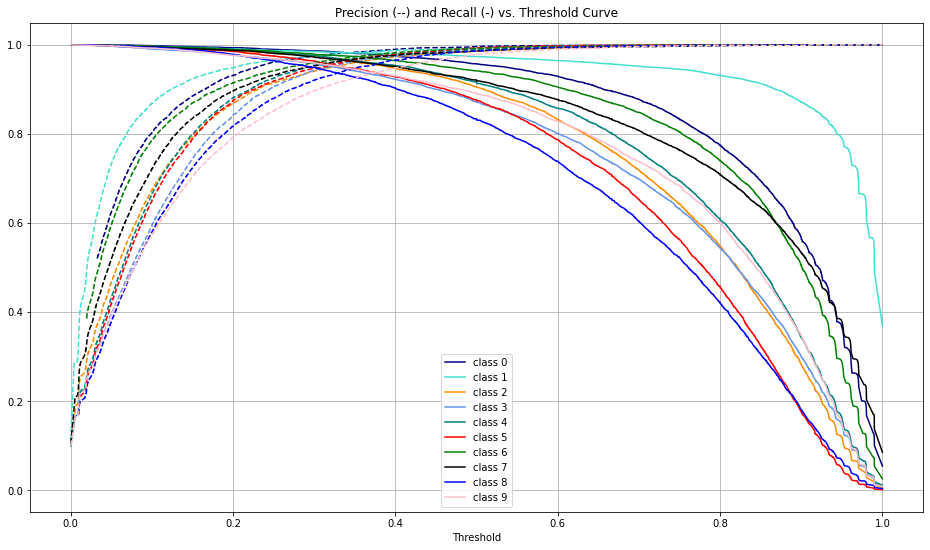

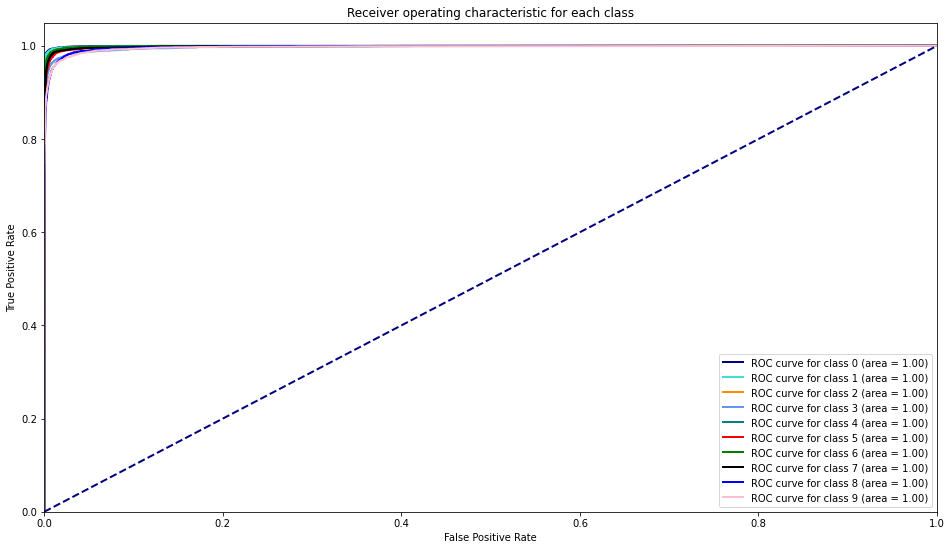

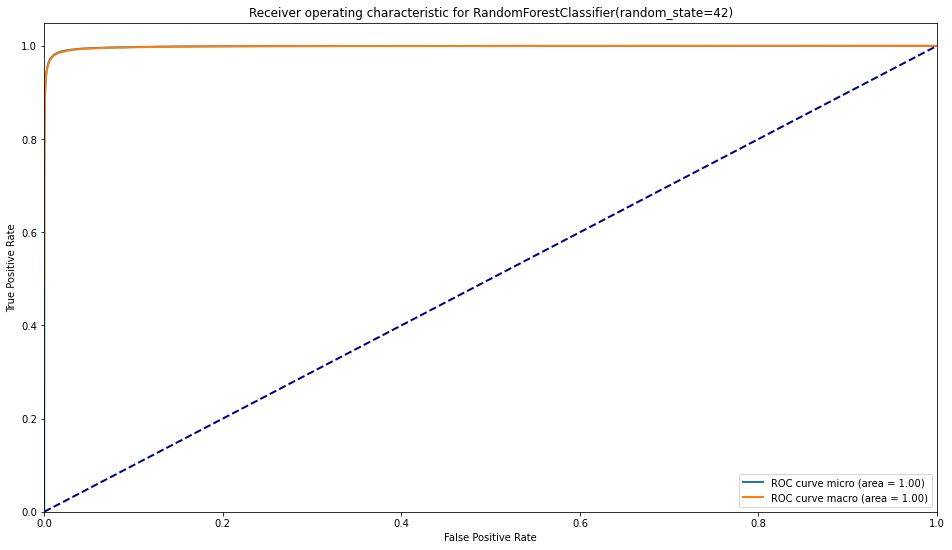

In [29]:
rfc = analyze_classifier(rf_classifier, X_train_prepared, y_train, y_train_score)
rfc.plot_precision_recall_micro()
rfc.plot_precision_recall_classes()
rfc.plot_precision_recall_vs_threshold()
rfc.plot_roc_classes()
rfc.plot_roc_micro_macro()

### Compare ROC curves

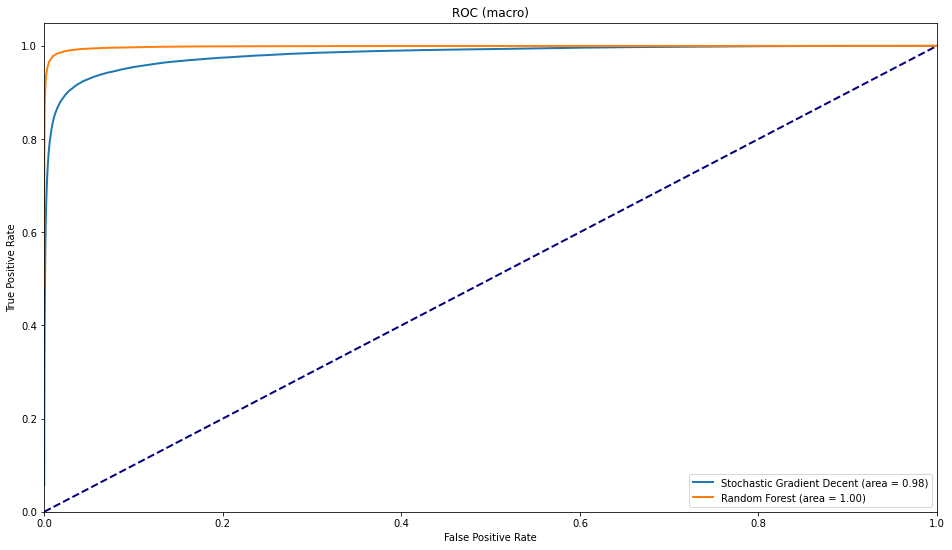

In [30]:
_, ax = plt.subplots(figsize=(16, 9))
lw = 2
ax.plot(
    sgd.fpr['macro'],
    sgd.tpr['macro'],
    lw=lw,
    label=("Stochastic Gradient Decent (area = %0.2f)" % sgd.roc_auc['macro']),
)
ax.plot(
    rfc.fpr['macro'],
    rfc.tpr['macro'],
    lw=lw,
    label=("Random Forest (area = %0.2f)" % rfc.roc_auc['macro']),
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (macro)")
plt.legend(loc="lower right")
plt.show()

## Analyze the most significant variables for each algorithm.

In [31]:
attributes = X.columns.tolist()
def feature_importance(features, attributes):
    for f, a in sorted(zip(features, attributes), reverse=True):
        print(f"{a}\t{f}")

### Stochastic Gradient Decent

In [32]:
sgd_features = sgd_classifier.estimators_[0].named_steps['sgdclassifier'].coef_[0]
feature_importance(sgd_features, attributes)

pixel515	17.546606067694842
pixel487	16.662618589489337
pixel459	15.126428700554692
pixel486	14.525696906299395
pixel514	14.468784586713527
pixel543	14.098797160618878
pixel571	13.63379481728202
pixel431	13.065091182038573
pixel572	12.766228120613741
pixel600	12.492292287095873
pixel458	12.419293978998946
pixel628	12.151246275835064
pixel428	11.861608889211379
pixel485	11.681317435534204
pixel599	11.495425383364559
pixel456	11.378145058814495
pixel457	10.98955513627137
pixel513	9.961526083882646
pixel400	9.933359085185417
pixel629	9.855626489818242
pixel429	9.523936817136757
pixel430	9.469813763535141
pixel656	9.451319193580314
pixel356	9.430180455840594
pixel627	9.381122902637573
pixel271	9.352678842434006
pixel242	9.346368755716137
pixel384	9.315316673511925
pixel484	9.314633132529462
pixel630	9.07332738293291
pixel657	8.985976343821354
pixel414	8.78780275288525
pixel570	8.68651325105341
pixel357	8.620232777788726
pixel403	8.590419743274108
pixel386	8.514073113883203
pixel243	8.45096

### Random Forest

In [33]:
rf_features = rf_classifier.estimators_[0].named_steps['randomforestclassifier'].feature_importances_
feature_importance(rf_features, attributes)

pixel436	0.02348422330214611
pixel382	0.021665874658243857
pixel462	0.020373119817759685
pixel387	0.0197447200821
pixel386	0.019733491114215556
pixel359	0.019117473705918334
pixel408	0.018743440484731776
pixel463	0.01870655192372851
pixel360	0.01832507450288561
pixel434	0.016841075684318915
pixel358	0.016694682638957146
pixel332	0.01600059203885824
pixel409	0.015786770087080116
pixel407	0.01569566607124858
pixel415	0.015354177072854516
pixel435	0.014784616024214842
pixel381	0.014461242796715758
pixel483	0.013907434383375421
pixel331	0.013490061991560323
pixel437	0.013380184356235407
pixel491	0.012378588221679553
pixel464	0.011533931029299662
pixel410	0.01149344222240815
pixel330	0.011386475726472604
pixel490	0.009805304488116721
pixel352	0.009773528529815665
pixel380	0.009057087760852386
pixel512	0.008729859433925187
pixel383	0.008378940038891525
pixel456	0.00799510655275004
pixel569	0.007911219254661261
pixel416	0.007862233623263102
pixel388	0.007814613718889522
pixel455	0.00771909829

## Analyze the types of errors the models make.
- What data would a human have used to avoid these errors?

## Perform a quick round of feature selection and engineering.

## Perform one or two more quick iterations of the five previous steps.

## Shortlist the top three to five most promising models, preferring models that make different types of errors.

# Fine-Tune the System
- You will want to use as much data as possible for this step, especially as you move towards the end of fine-tuning.
- As always automate what you can.

## Fine-tune the hyperparameters using cross-validation.
- Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you are not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
- Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors).

In [34]:
rf_classifier.estimator[0].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

param_grid = [
    {'estimator__randomforestclassifier__n_estimators': [3, 10], 'estimator__randomforestclassifier__max_features': [2]},
    {'estimator__randomforestclassifier__bootstrap': [False], 'estimator__randomforestclassifier__n_estimators': [3, 10], 'estimator__randomforestclassifier__max_features': [2, 3, 4]}
]
scores = ['accuracy',
           'precision_macro',
           'recall_macro',
           'f1_macro',
           'precision_micro',
           'recall_micro',
           'f1_micro',
           'f1_weighted']

grid_search_models = {}
for score in scores:
    grid_search = GridSearchCV(
        rf_classifier, param_grid=param_grid, cv=2, scoring=score, refit=True
    )
    grid_search.fit(X_train_prepared, y_train)
    grid_search_models[score] = grid_search

In [36]:
for key in grid_search_models.keys():
    print(f'-----------{key}-----------')
    print('best score: ', grid_search_models[key].best_score_)
    print('best parameters: ', grid_search_models[key].best_params_)
    print('best model: ', grid_search_models[key].best_estimator_)
    cv_res = grid_search_models[key].cv_results_
    print('cross validation results')
    for mean_score, std_score, param in zip(cv_res["mean_test_score"], cv_res["std_test_score"], cv_res["params"]):
        print(mean_score, std_score, param)

-----------accuracy-----------
best score:  0.9327166666666666
best parameters:  {'estimator__randomforestclassifier__bootstrap': False, 'estimator__randomforestclassifier__max_features': 4, 'estimator__randomforestclassifier__n_estimators': 10}
best model:  OneVsRestClassifier(estimator=Pipeline(steps=[('randomforestclassifier',
                                               RandomForestClassifier(bootstrap=False,
                                                                      max_features=4,
                                                                      n_estimators=10,
                                                                      random_state=42))]))
cross validation results
0.8026 0.0010333333333333306 {'estimator__randomforestclassifier__max_features': 2, 'estimator__randomforestclassifier__n_estimators': 3}
0.9117 0.0004666666666666708 {'estimator__randomforestclassifier__max_features': 2, 'estimator__randomforestclassifier__n_estimators': 10}
0.8263333333333

## Try Ensemble methods. Combining your best models will often produce better performance than running them individually.

## Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.
- Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.

-----------accuracy-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


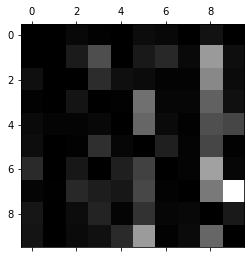

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



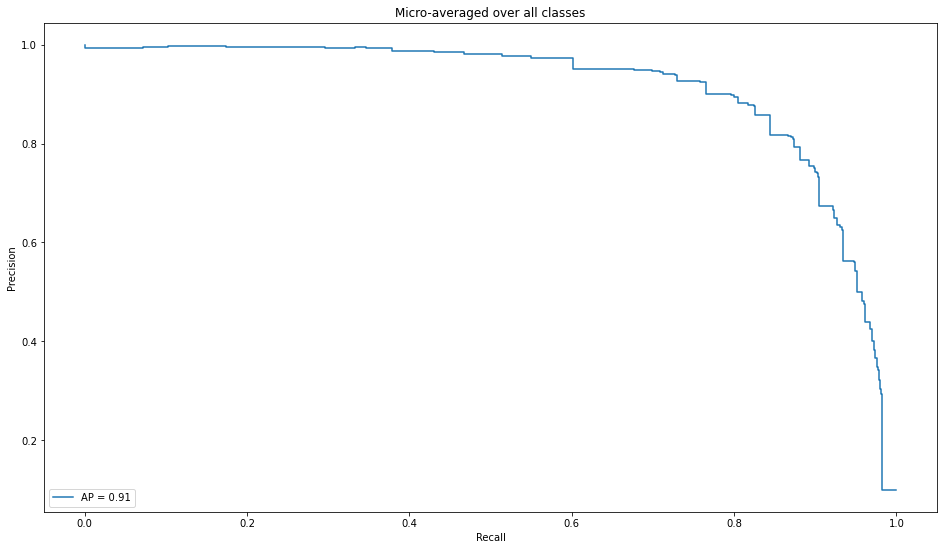

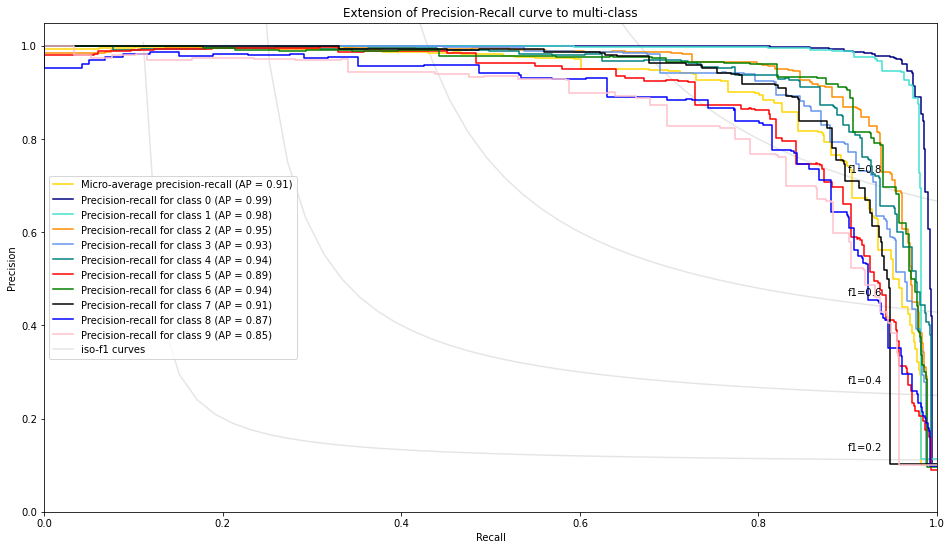

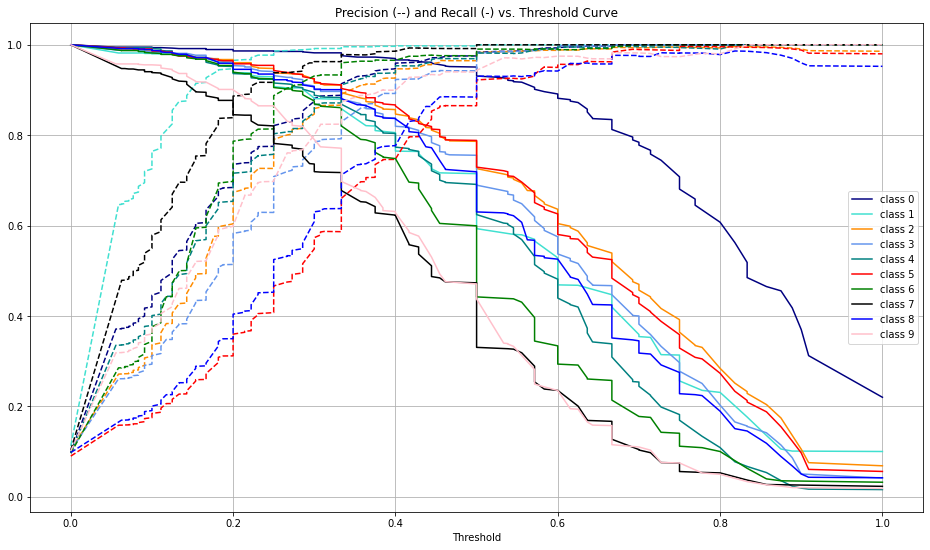

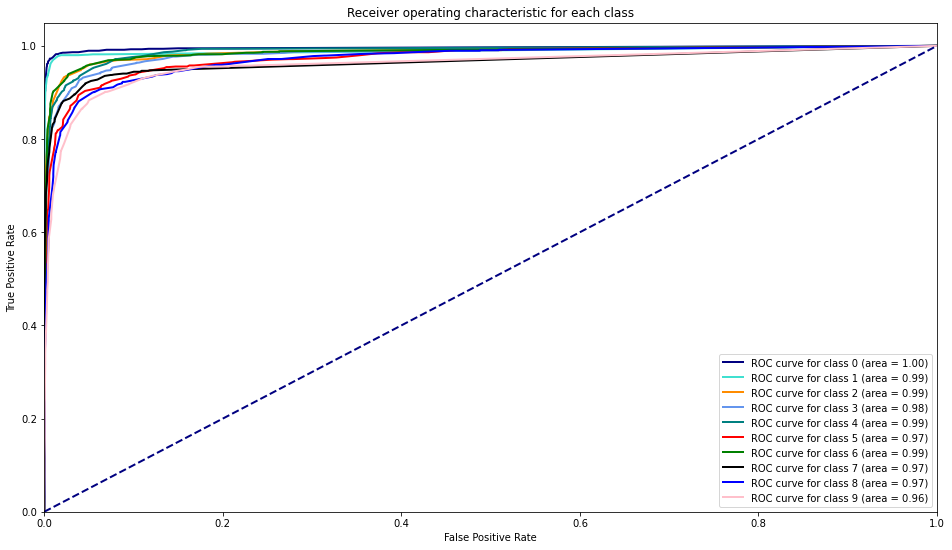

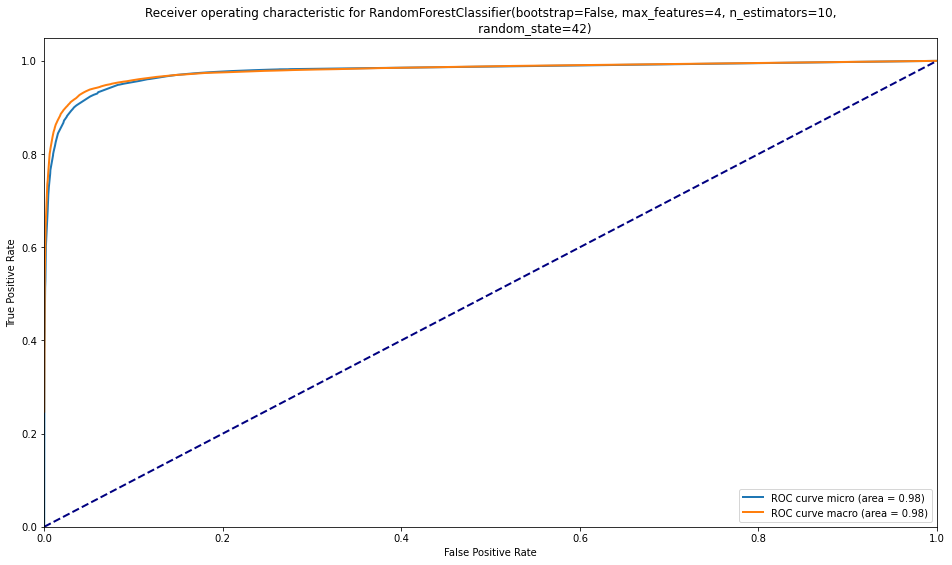

-----------precision_macro-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


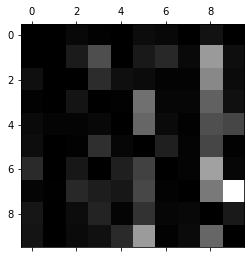

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



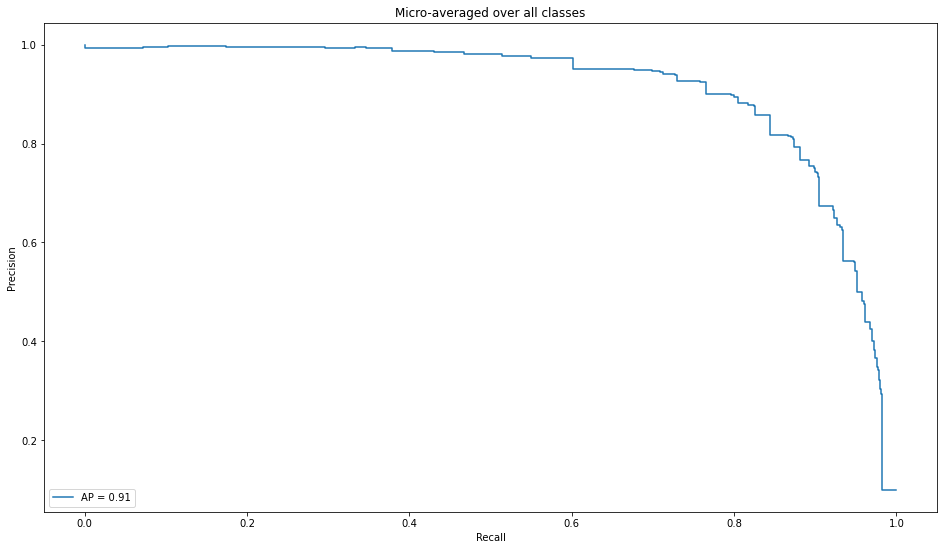

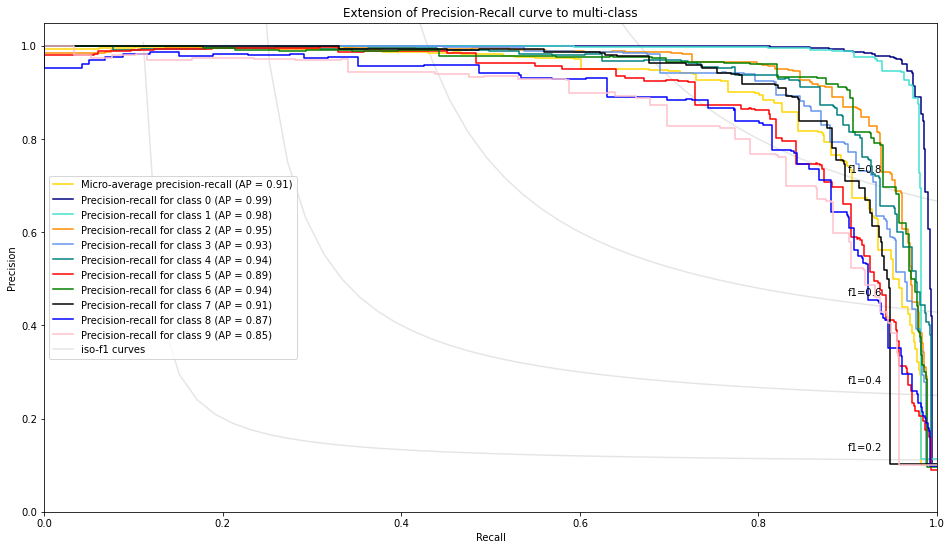

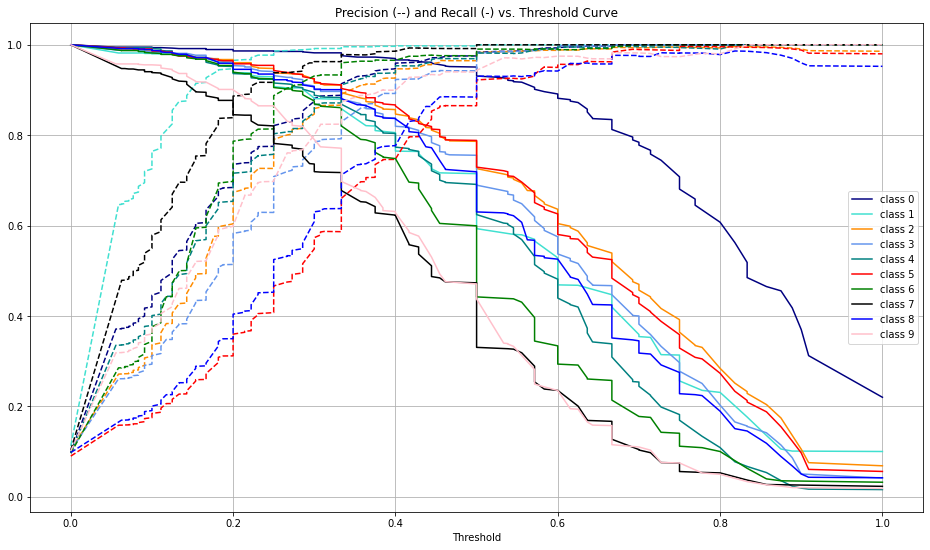

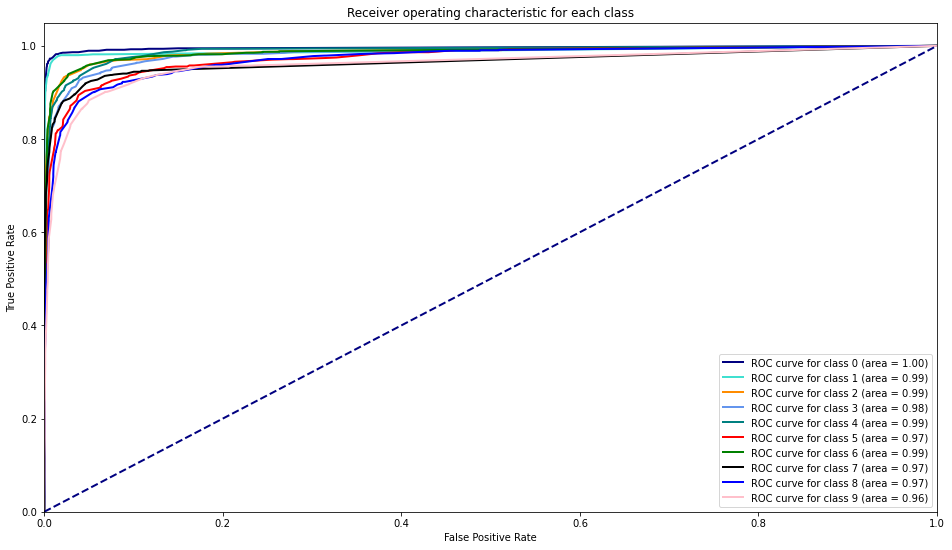

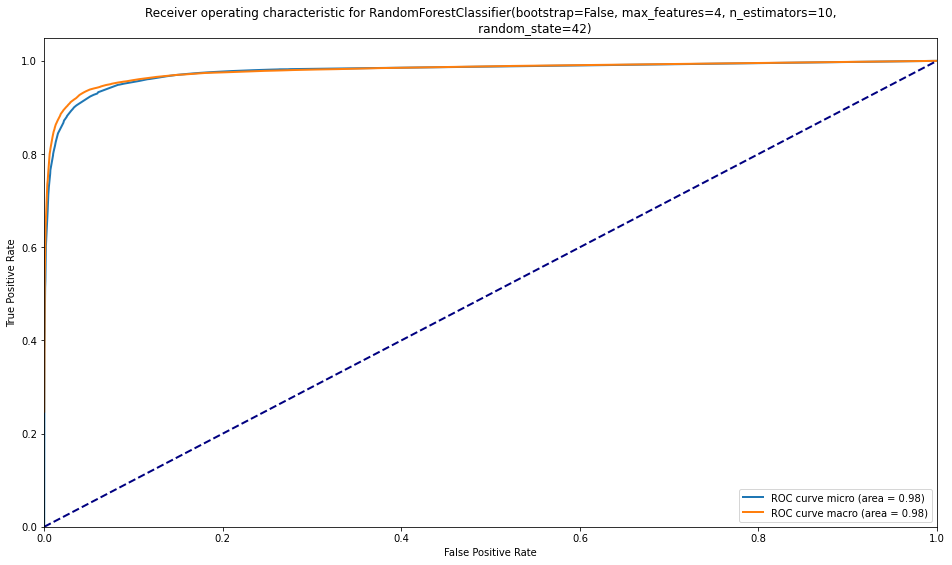

-----------recall_macro-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


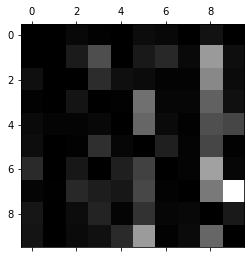

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



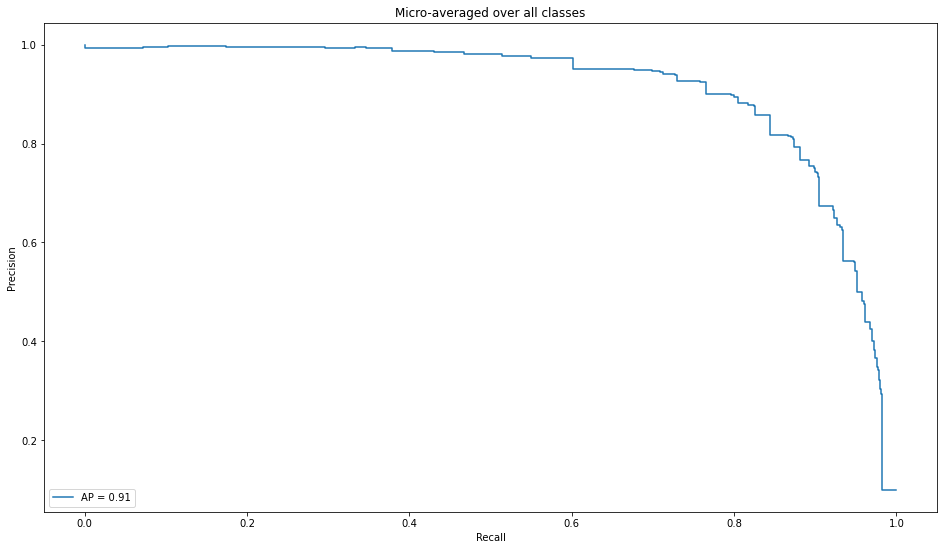

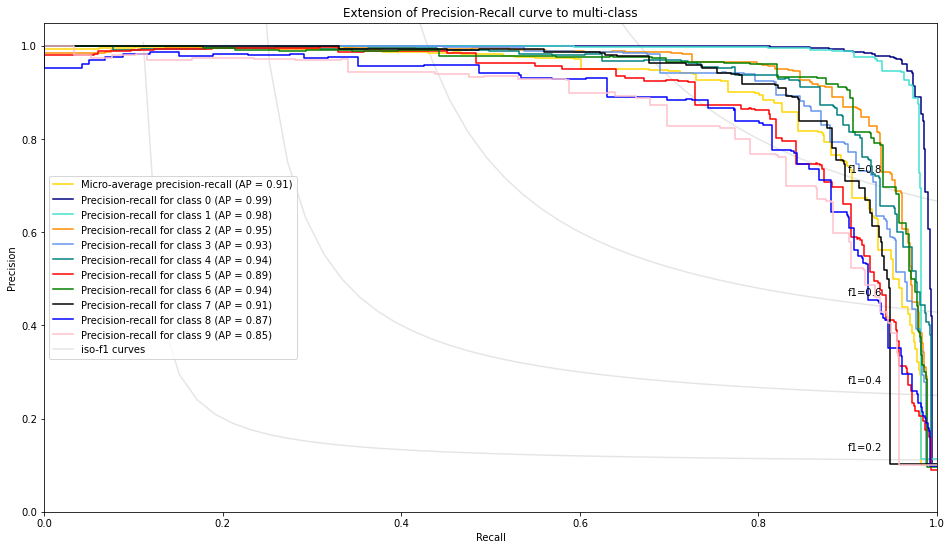

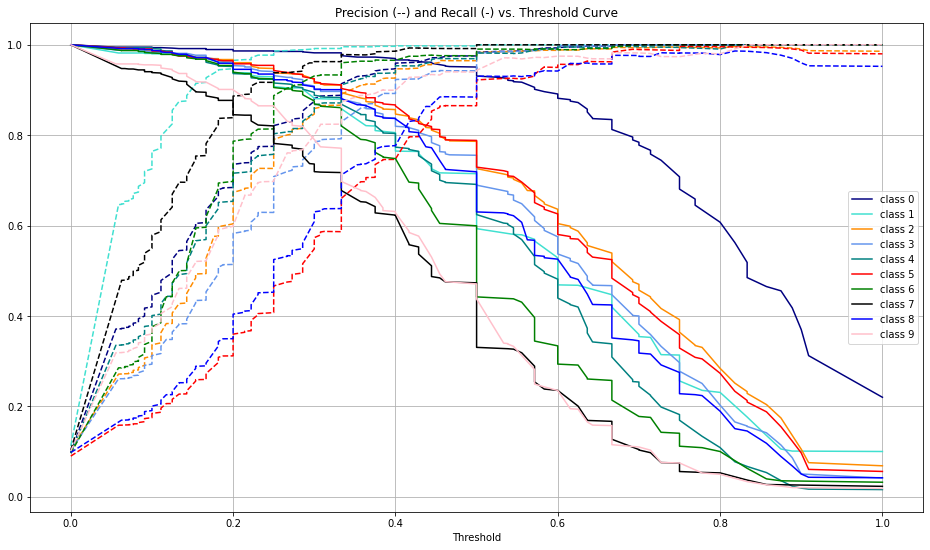

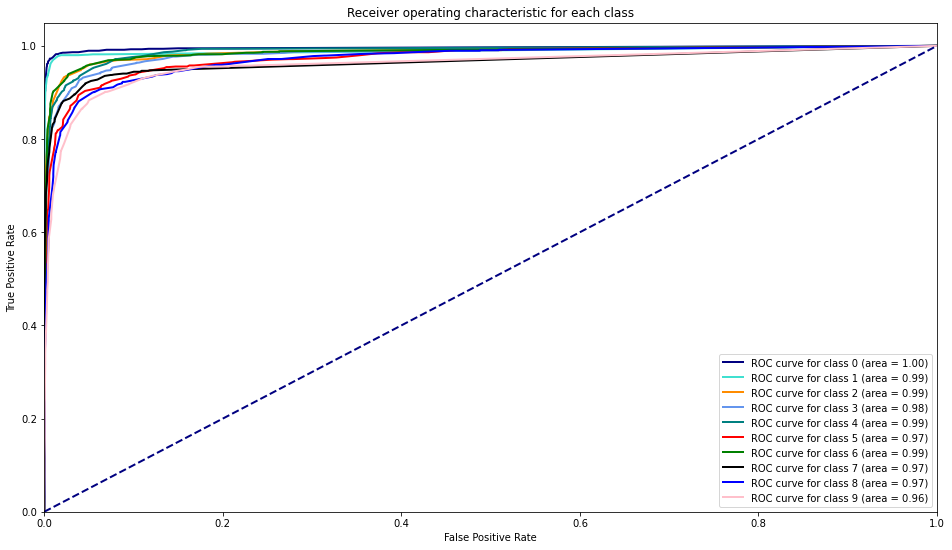

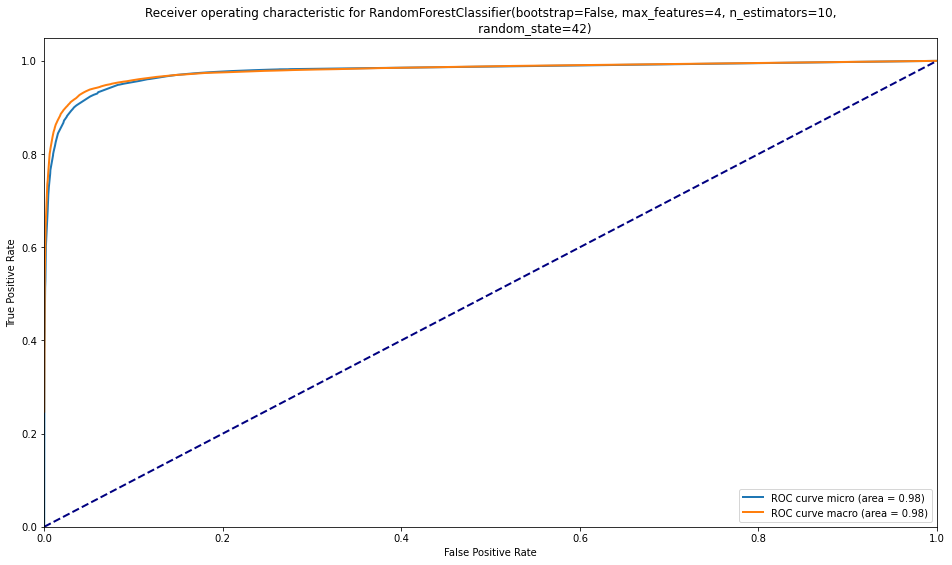

-----------f1_macro-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


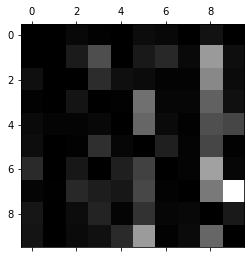

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



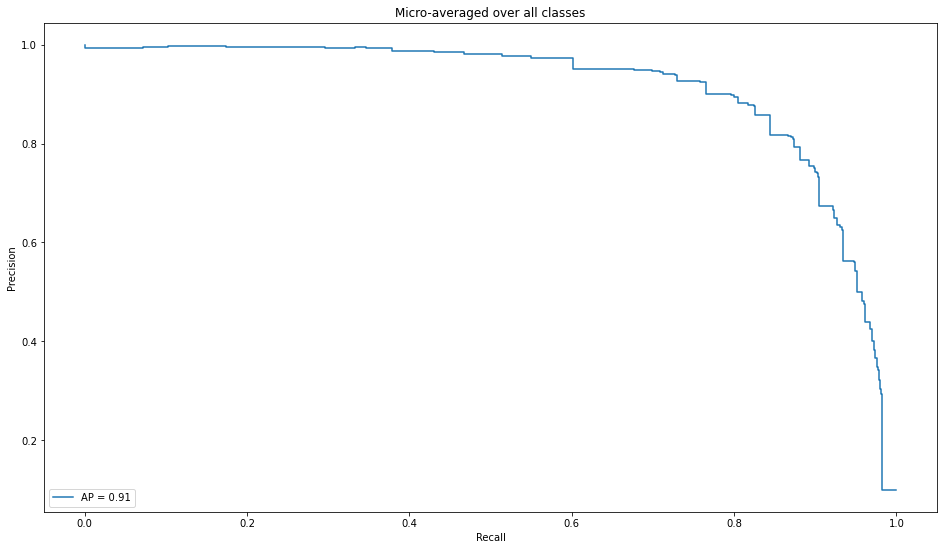

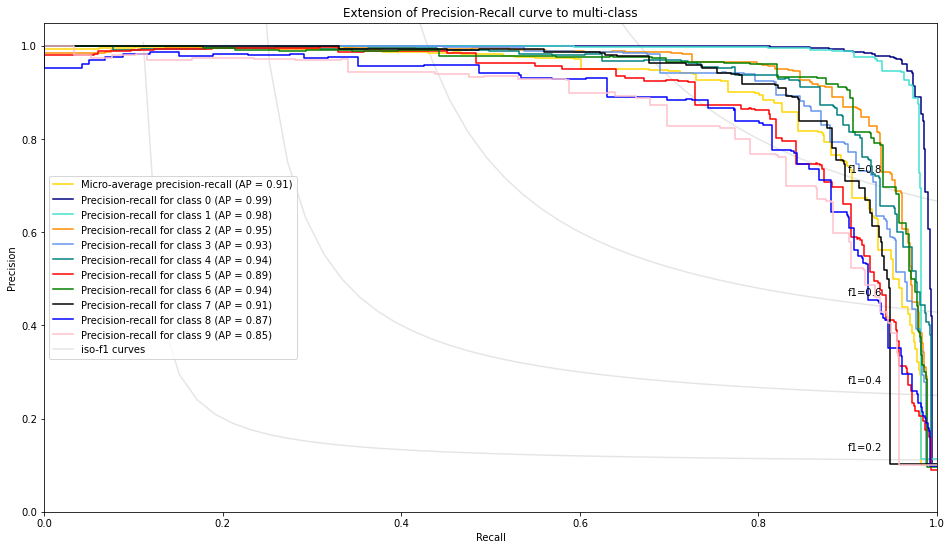

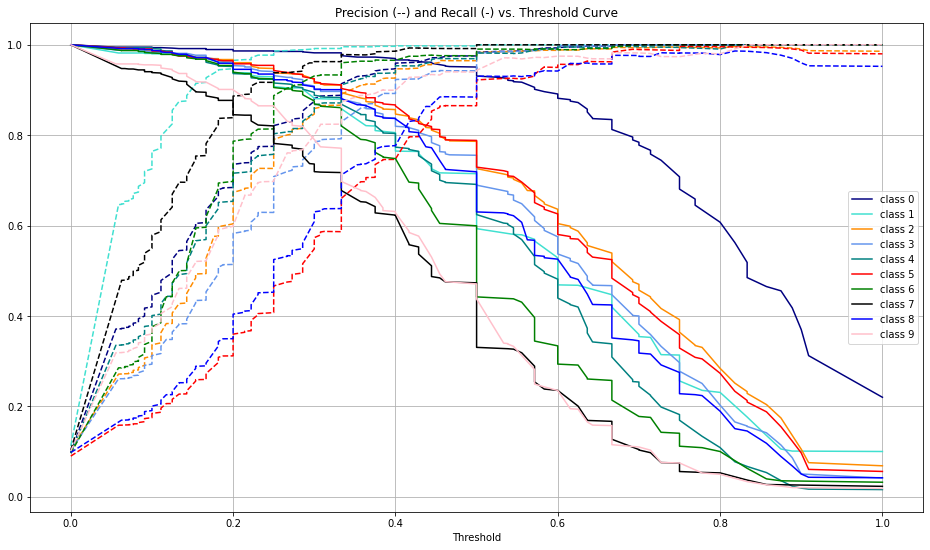

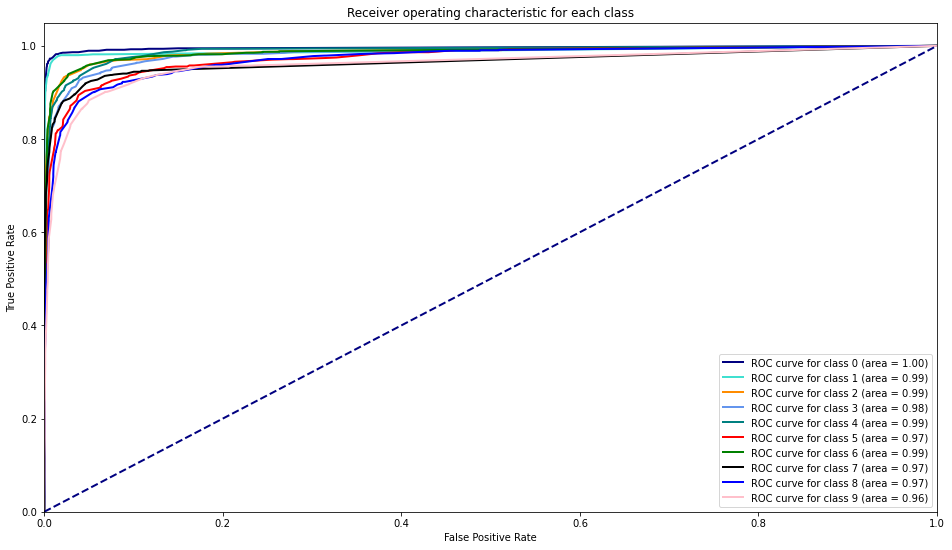

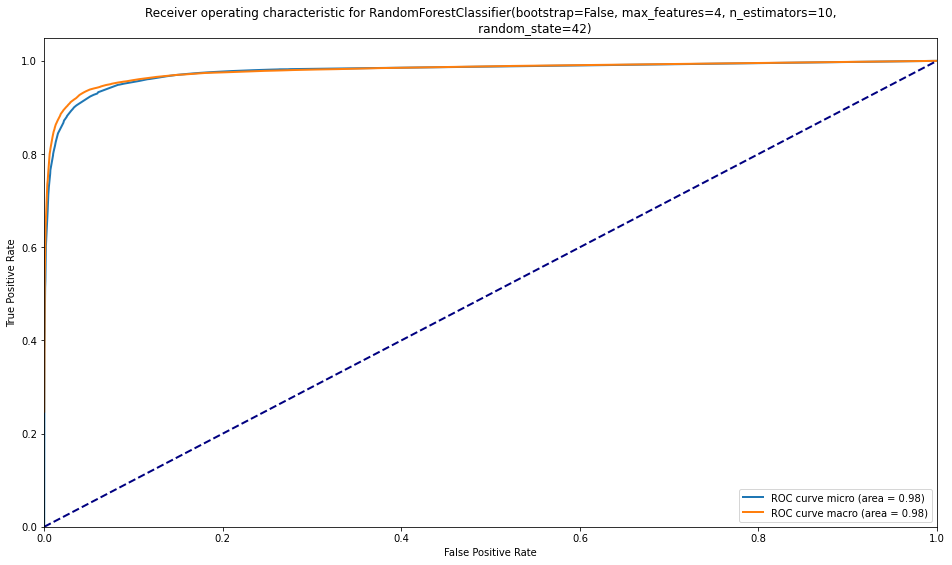

-----------precision_micro-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


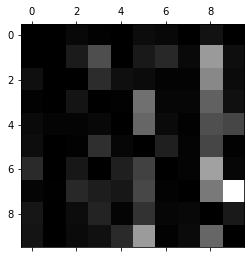

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



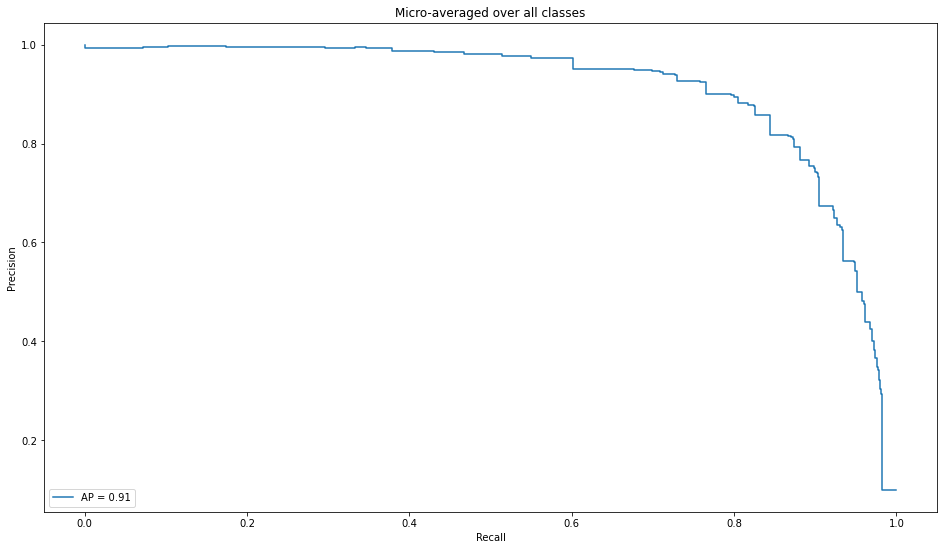

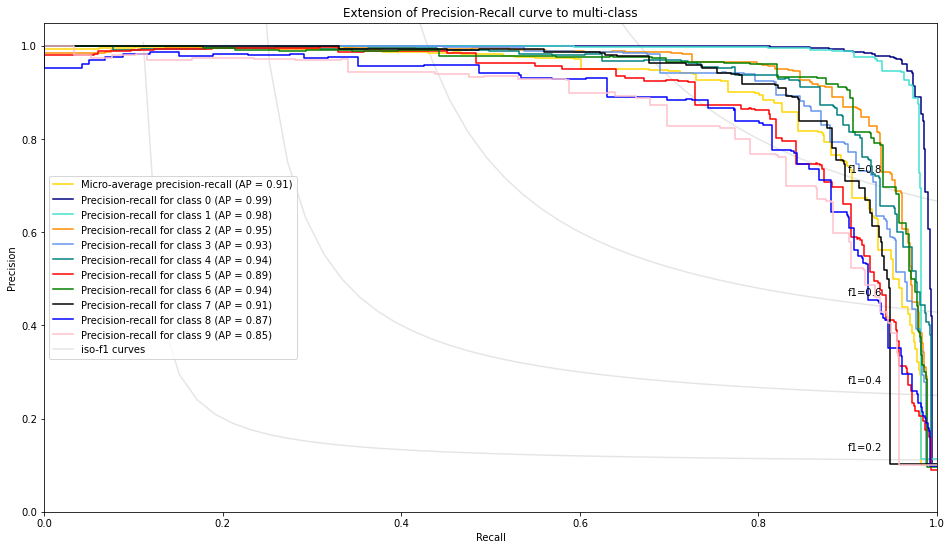

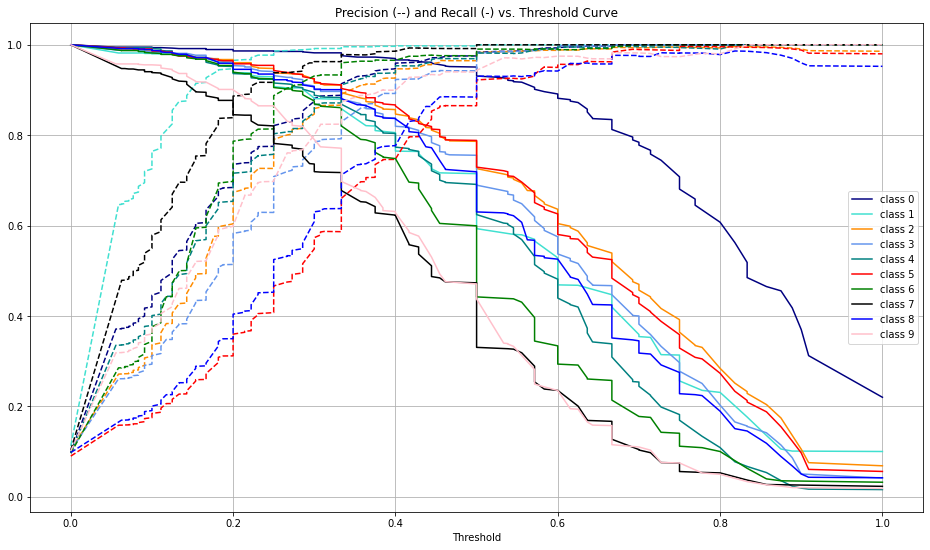

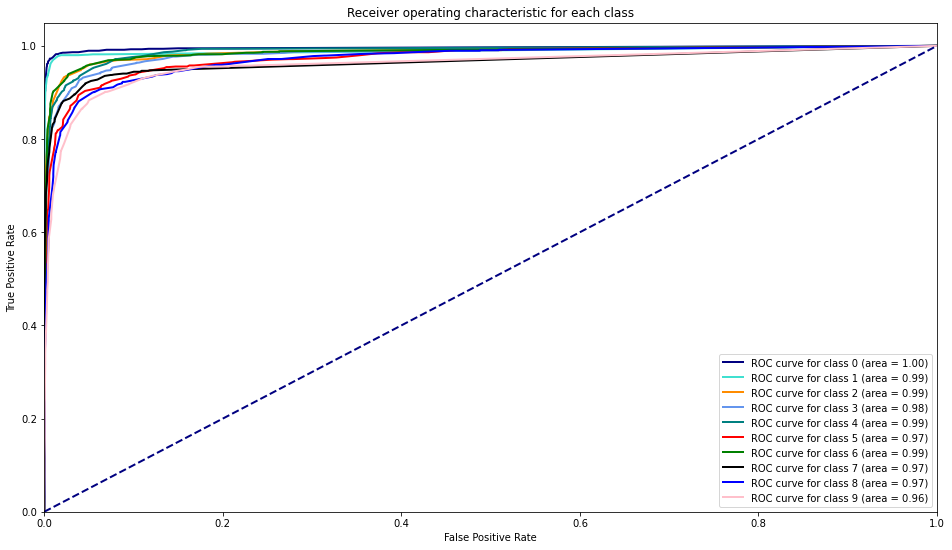

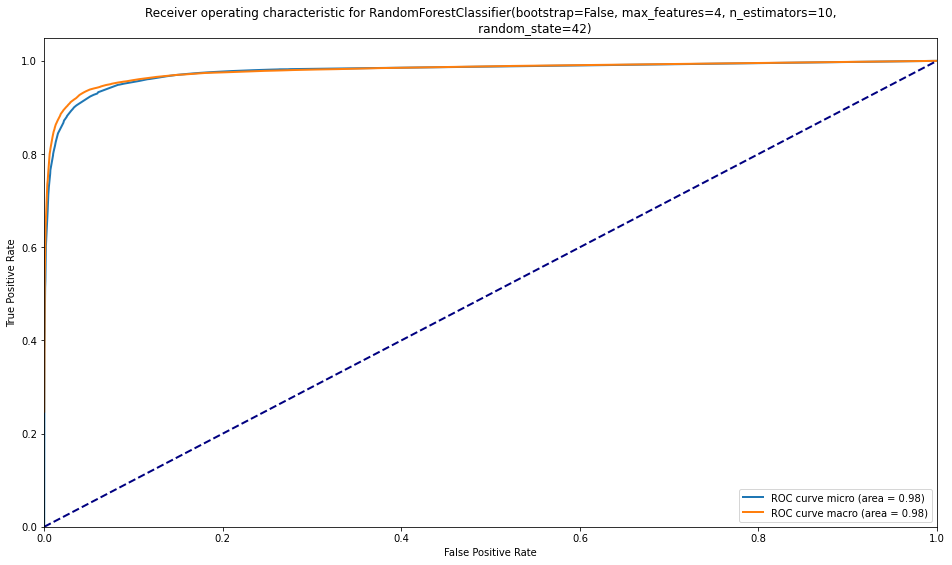

-----------recall_micro-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


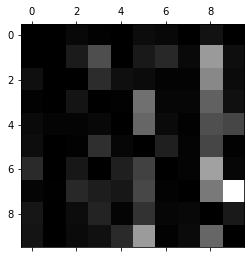

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



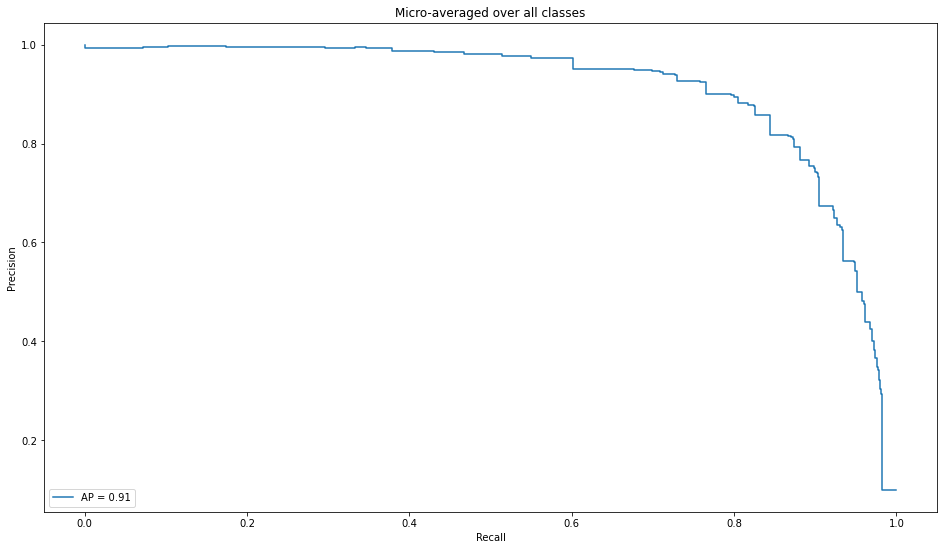

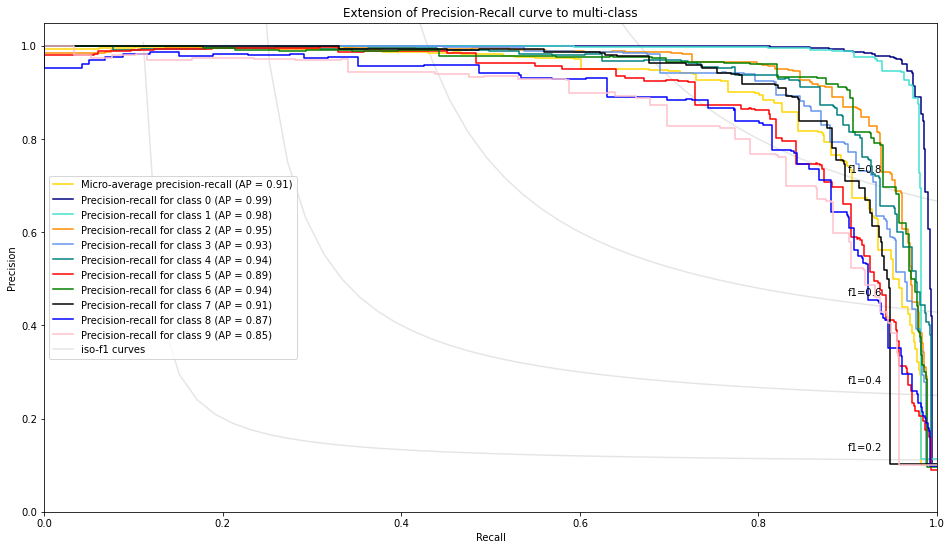

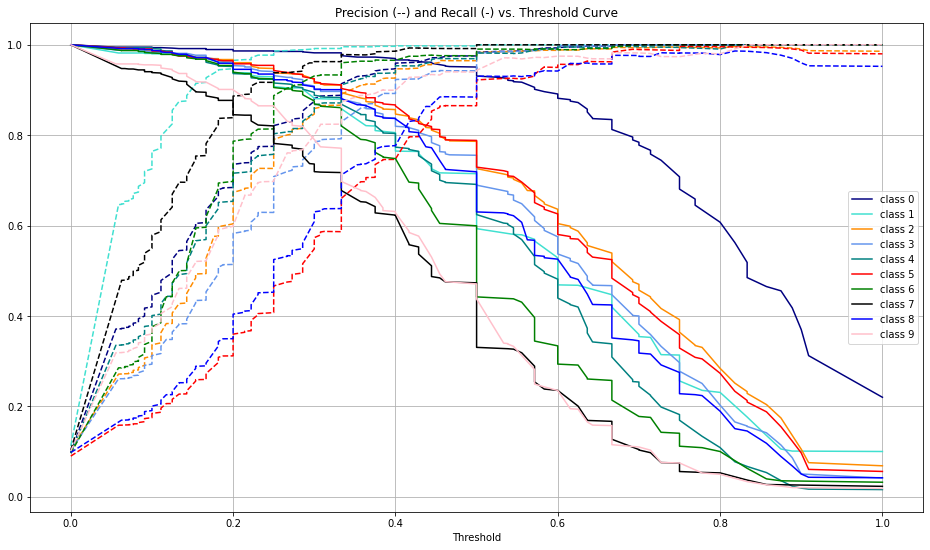

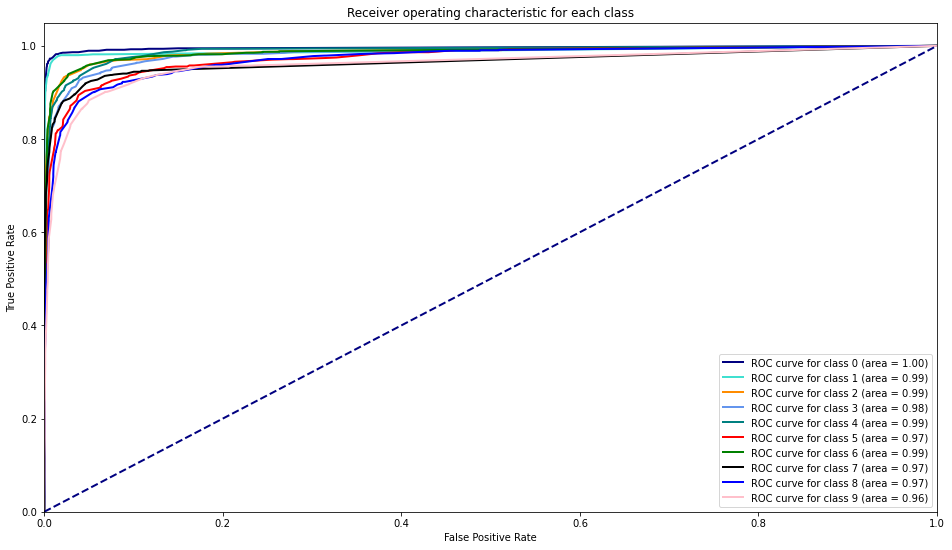

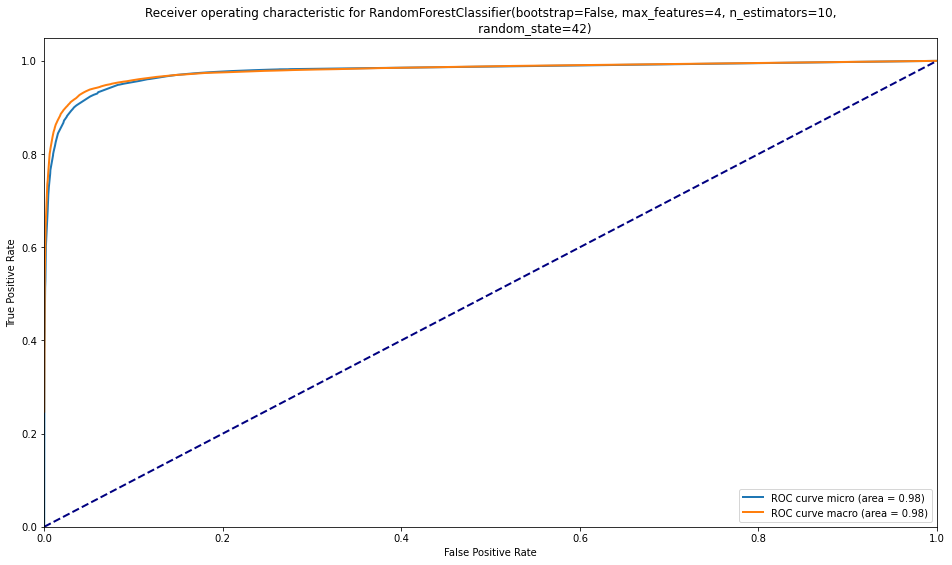

-----------f1_micro-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


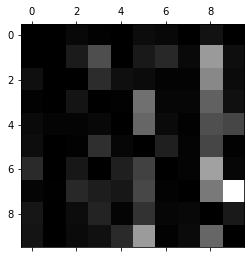

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



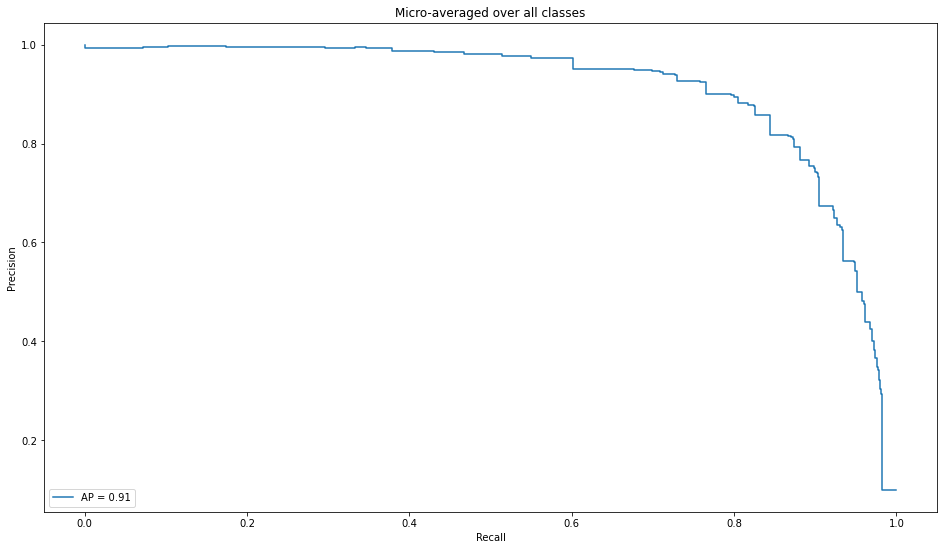

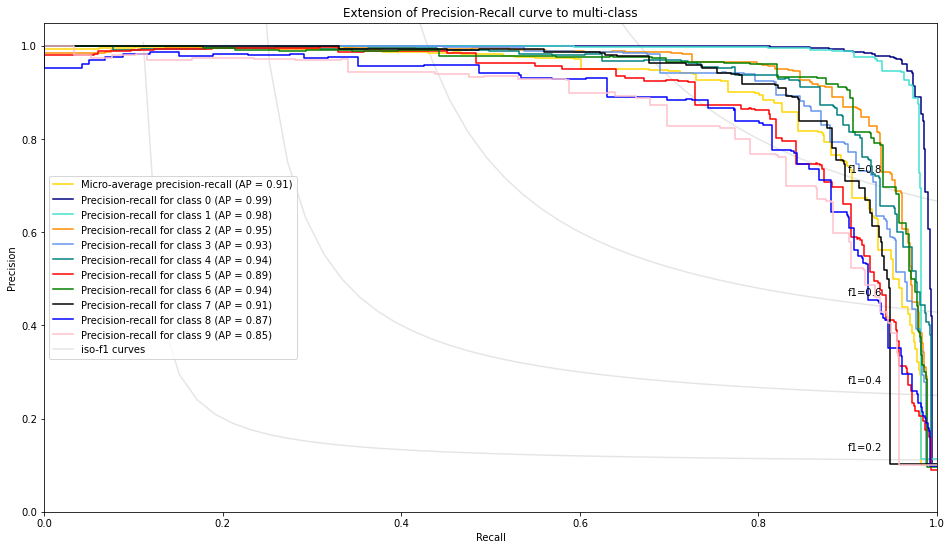

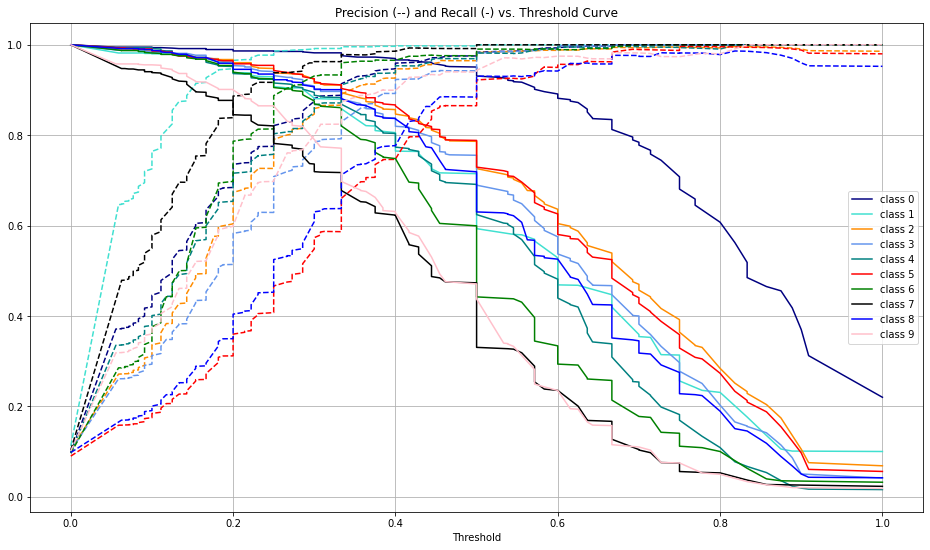

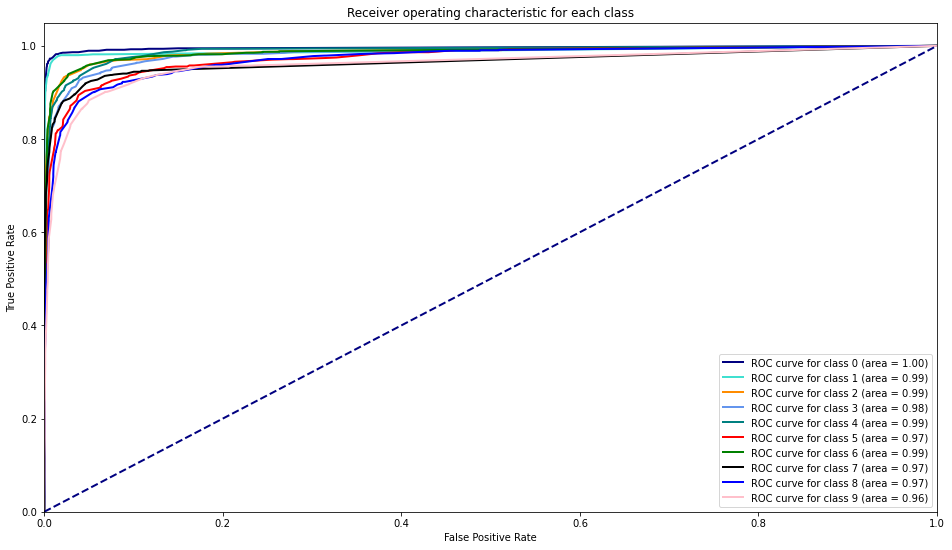

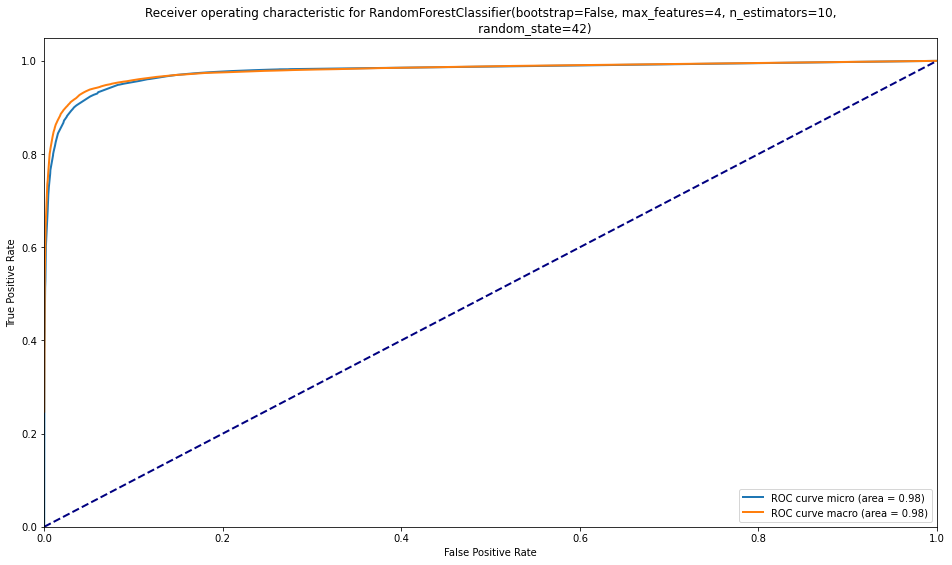

-----------f1_weighted-----------
[[931   0   4   1   0   6   4   0   9   0]
 [  0 908  15  43   0  14  23   5  85   8]
 [  8   0 887  23   8   6   2   2  69   6]
 [  1   0  10 867   1  56   3   3  49   8]
 [  5   2   2   4 818  49   5   1  38  34]
 [  6   0   1  21   3 800  14   2  31   1]
 [ 20   0  11   0  15  31 783   2  76   3]
 [  3   1  21  15  12  36   2 728  61 129]
 [ 11   0   6  17   2  24   3   4 878  12]
 [ 10   0   5   8  21  77   1   5  51 814]]


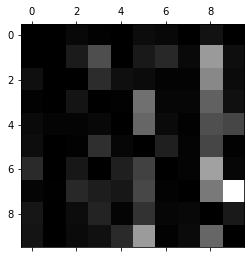

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       955
           1       1.00      0.82      0.90      1101
           2       0.92      0.88      0.90      1011
           3       0.87      0.87      0.87       998
           4       0.93      0.85      0.89       958
           5       0.73      0.91      0.81       879
           6       0.93      0.83      0.88       941
           7       0.97      0.72      0.83      1008
           8       0.65      0.92      0.76       957
           9       0.80      0.82      0.81       992

    accuracy                           0.86      9800
   macro avg       0.87      0.86      0.86      9800
weighted avg       0.88      0.86      0.86      9800



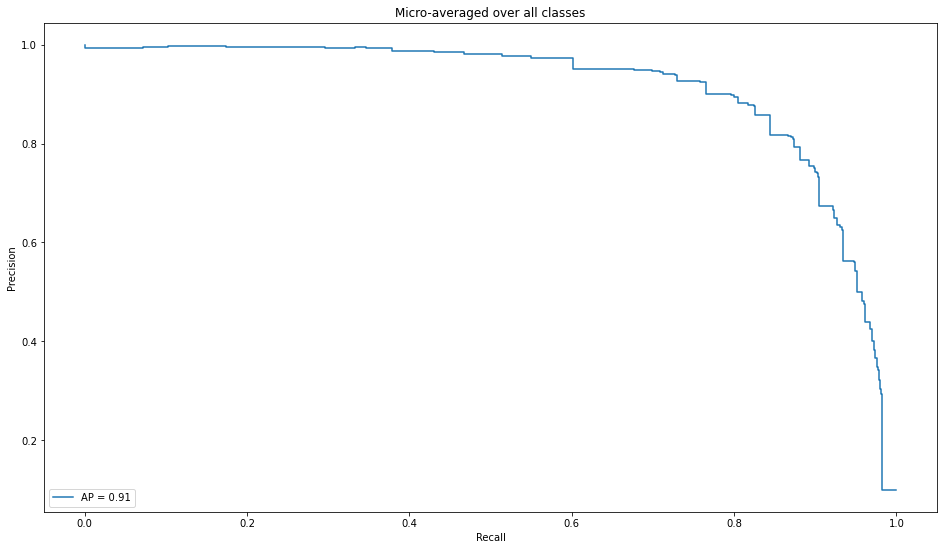

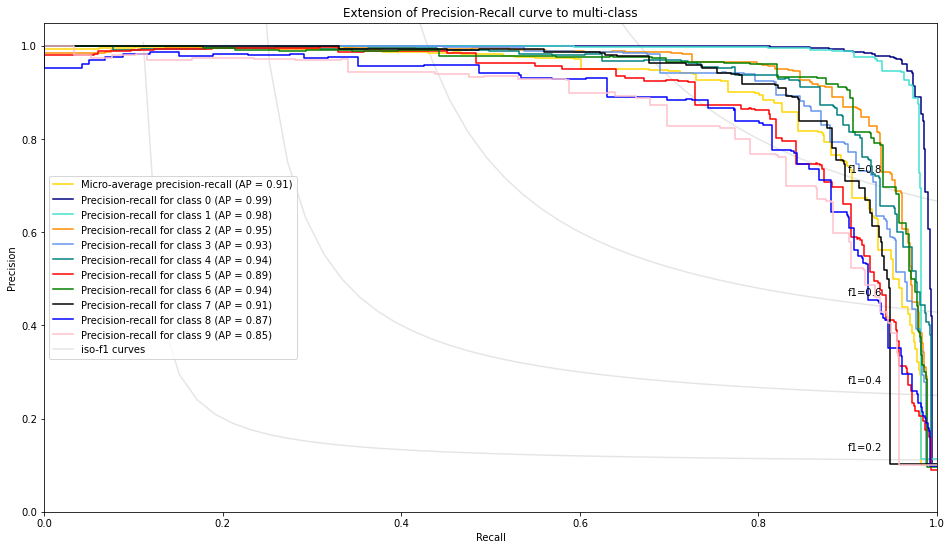

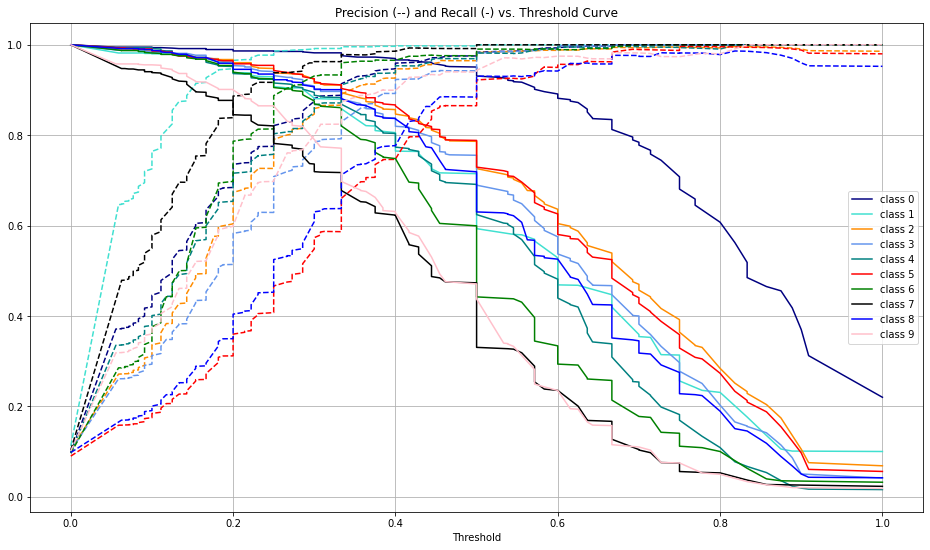

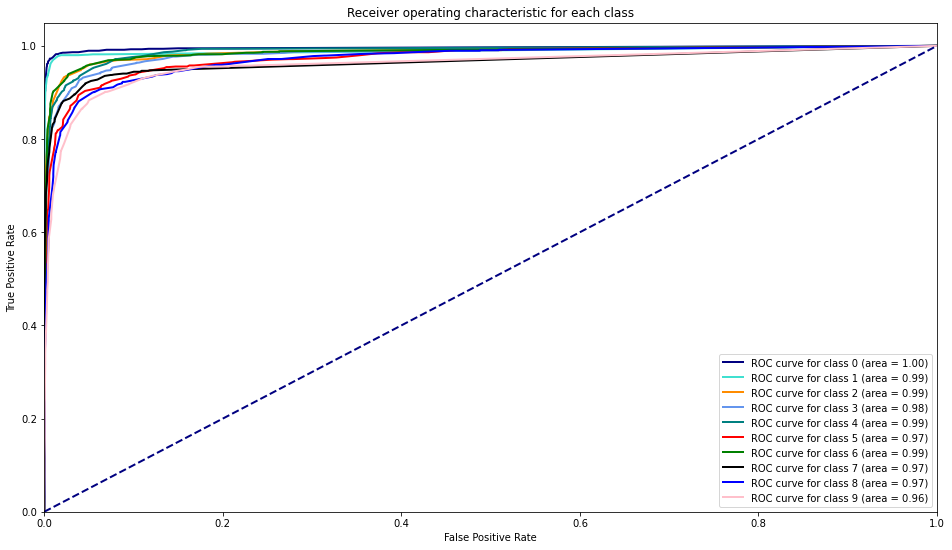

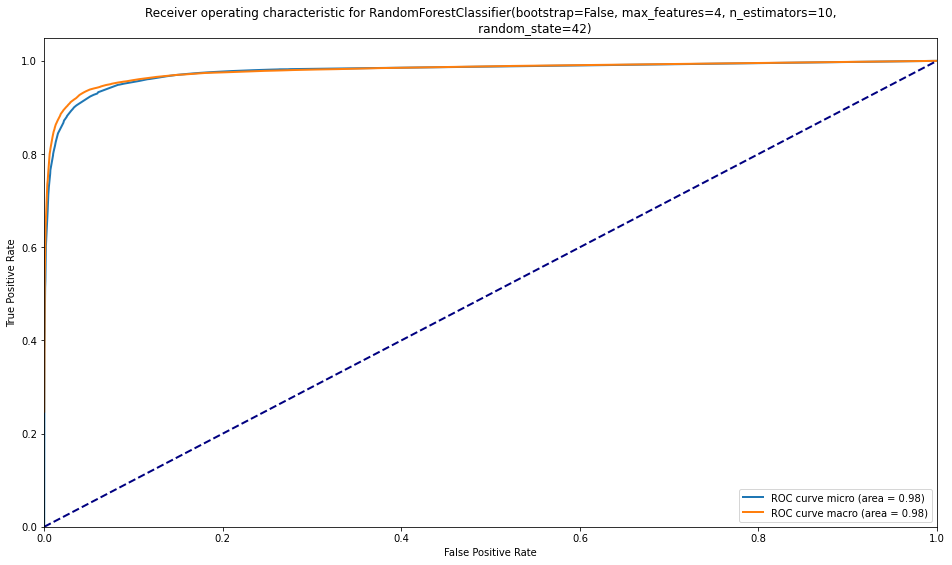

In [37]:
n = 9800
for key in grid_search_models.keys():
    print(f'-----------{key}-----------')
    final_model = grid_search_models[key].best_estimator_
    X_test_prepared = num_pipeline.fit_transform(X_test[0:n])
    y_test_pred = final_model.predict(X_test_prepared)
    conf_mx = confusion_matrix(y_test[0:n], y_test_pred)
    print(conf_mx)
    plot_normalized_confusion_matrix(conf_mx)
    print(classification_report(y_test[0:n], y_test_pred))
    fm = analyze_classifier(final_model, X_test_prepared, y_test[0:n])
    fm.plot_precision_recall_micro()
    fm.plot_precision_recall_classes()
    fm.plot_precision_recall_vs_threshold()
    fm.plot_roc_classes()
    fm.plot_roc_micro_macro()

# Present Your Solution

## Document what you have down.

## Create a nice presentation.
- Make sure you highlight the big picture first.

## Explain why your solution achieves the business objective.

## Don't forget to present interesting points you noticed along the way.
- Describe what worked and what did not.
- List your assumptions and your system's limitations.

## Ensure your key findings are communicated through beautiful visalizations or easy-to-remember statements.

# Launch!

## Get your solution ready for production (plug into production data inputs, write unit tests, etc.).

## Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.
- Beware of slow degradation: models tend to "rot" as data evolves.
- Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).
- Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is particularly important for online learning systems.

## Retrain your models on regular basis on fresh data (automate as much as possible).